## Import libraries

In [1]:
!pip install seaborn
!pip install great_expectations

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## Load Data

In [3]:
data = pd.read_csv('./Airbnb_Data.csv')
data

id  log_price property_type        room_type  \
0       6901257   5.010635     Apartment  Entire home/apt   
1       6304928   5.129899     Apartment  Entire home/apt   
2       7919400   4.976734     Apartment  Entire home/apt   
3      13418779   6.620073         House  Entire home/apt   
4       3808709   4.744932     Apartment  Entire home/apt   
...         ...        ...           ...              ...   
74106  14549287   4.605170     Apartment     Private room   
74107  13281809   5.043425     Apartment  Entire home/apt   
74108  18688039   5.220356     Apartment  Entire home/apt   
74109  17045948   5.273000     Apartment  Entire home/apt   
74110   3534845   4.852030          Boat  Entire home/apt   

                                               amenities  accommodates  \
0      {"Wireless Internet","Air conditioning",Kitche...             3   
1      {"Wireless Internet","Air conditioning",Kitche...             7   
2      {TV,"Cable TV","Wireless Internet","Air condit...             5   
3      {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
4      {TV,Internet,"Wireless Internet","Air conditio...             2   
...                                                  ...           ...   
74106                                                 {}             1   
74107  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
74108  {TV,Internet,"Wireless Internet","Air conditio...             5   
74109  {TV,"Wireless Internet","Air conditioning",Kit...             2   
74110  {TV,Internet,"Wireless Internet",Kitchen,"Free...             4   

       bathrooms  bed_type cancellation_policy  cleaning_fee  ...   latitude  \
0            1.0  Real Bed              strict          True  ...  40.696524   
1            1.0  Real Bed              strict          True  ...  40.766115   
2            1.0  Real Bed            moderate          True  ...  40.808110   
3            1.0  Real Bed            flexible          True  ...  37.772004   
4            1.0  Real Bed            moderate          True  ...  38.925627   
...          ...       ...                 ...           ...  ...        ...   
74106        1.0  Real Bed            flexible         False  ...  40.709025   
74107        2.0  Real Bed            moderate          True  ...  33.871549   
74108        1.0  Real Bed            moderate          True  ...  40.706749   
74109        1.0  Real Bed              strict          True  ...  40.738535   
74110        1.0  Real Bed            moderate         False  ...  33.761096   

        longitude                                        name  \
0      -73.991617              Beautiful brownstone 1-bedroom   
1      -73.989040    Superb 3BR Apt Located Near Times Square   
2      -73.943756                            The Garden Oasis   
3     -122.431619          Beautiful Flat in the Heart of SF!   
4      -77.034596                  Great studio in midtown DC   
...           ...                                         ...   
74106  -73.939405                           one room bushwick   
74107 -118.396053                Spacious Hermosa 2 BR on PCH   
74108  -73.942377  Modern 2 Bedroom Apartment in Williamsburg   
74109  -74.000157        Designer's Apartment in HEART of NYC   
74110 -118.192409              Cozy Boat at Shoreline Village   

          neighbourhood number_of_reviews review_scores_rating  \
0      Brooklyn Heights                 2                100.0   
1        Hell's Kitchen                 6                 93.0   
2                Harlem                10                 92.0   
3          Lower Haight                 0                  NaN   
4      Columbia Heights                 4                 40.0   
...                 ...               ...                  ...   
74106      Williamsburg                 0                  NaN   
74107     Hermosa Beach                16                 93.0   
74108      Williamsburg                43              

## Data Description and exploration

here are some basic statistics about our data

In [4]:
data.describe(include='all').T

count unique  \
id                      74111.0    NaN   
log_price               74111.0    NaN   
property_type             74111     35   
room_type                 74111      3   
amenities                 74111  67122   
accommodates            74111.0    NaN   
bathrooms               73911.0    NaN   
bed_type                  74111      5   
cancellation_policy       74111      5   
cleaning_fee              74111      2   
city                      74111      6   
description               74111  73479   
first_review              58247   2554   
host_has_profile_pic      73923      2   
host_identity_verified    73923      2   
host_response_rate        55812     80   
host_since                73923   3087   
instant_bookable          74111      2   
last_review               58284   1371   
latitude                74111.0    NaN   
longitude               74111.0    NaN   
name                      74111  73359   
neighbourhood             67239    619   
number_of_reviews       74111.0    NaN   
review_scores_rating    57389.0    NaN   
thumbnail_url             65895  65883   
zipcode                   73145    769   
bedrooms                74020.0    NaN   
beds                    73980.0    NaN   

                                                                      top  \
id                                                                    NaN   
log_price                                                             NaN   
property_type                                                   Apartment   
room_type                                                 Entire home/apt   
amenities                                                              {}   
accommodates                                                          NaN   
bathrooms                                                             NaN   
bed_type                                                         Real Bed   
cancellation_policy                                                strict   
cleaning_fee                                                         True   
city                                                                  NYC   
description             Hello, I've been running guest house for Korea...   
first_review                                                   2017-01-01   
host_has_profile_pic                                                    t   
host_identity_verified                                                  t   
host_response_rate                                                   100%   
host_since                                                     2015-03-30   
instant_bookable                                                        f   
last_review                                                    2017-04-30   
latitude                                                              NaN   
longitude                                                             NaN   
name                               Bunk bed in the Treat Street Clubhouse   
neighbourhood                                                Williamsburg   
number_of_reviews                                                     NaN   
review_scores_rating                                                  NaN   
thumbnail_url           https://a0.muscache.com/im/pictures/70087089/b...   
zipcode                                                           11211.0   
bedrooms                                                              NaN   
beds                                                                  NaN   

                         freq             mean             std        min  \
id                        NaN  11266617.102468  6081734.886894      344.0   
log_price                 NaN         4.782069        0.717394        0.0   
property_type           49003              NaN             NaN        NaN   
room_type               41310              NaN             NaN        NaN   
amenities                 586              NaN             NaN       

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

the data contains is maded of 74111 rows,  29 columns, from first sight 11 of them are numeric

the data contains missing values, here is the number of missing values per columns 

In [6]:
data.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

percentage of missing values

here is the total number of missing values

In [7]:
# Function to count missing values
def count_nans(df):
    return df.isnull().sum().sum()

In [8]:
count_nans(data)

83752

number of unique values per features (and percentage)

In [9]:
data.nunique()

id                        74111
log_price                   767
property_type                35
room_type                     3
amenities                 67122
accommodates                 16
bathrooms                    17
bed_type                      5
cancellation_policy           5
cleaning_fee                  2
city                          6
description               73479
first_review               2554
host_has_profile_pic          2
host_identity_verified        2
host_response_rate           80
host_since                 3087
instant_bookable              2
last_review                1371
latitude                  74111
longitude                 74111
name                      73359
neighbourhood               619
number_of_reviews           371
review_scores_rating         54
thumbnail_url             65883
zipcode                     769
bedrooms                     11
beds                         18
dtype: int64

In [10]:
data.nunique() / len(data) * 100

id                        100.000000
log_price                   1.034934
property_type               0.047226
room_type                   0.004048
amenities                  90.569551
accommodates                0.021589
bathrooms                   0.022939
bed_type                    0.006747
cancellation_policy         0.006747
cleaning_fee                0.002699
city                        0.008096
description                99.147225
first_review                3.446182
host_has_profile_pic        0.002699
host_identity_verified      0.002699
host_response_rate          0.107946
host_since                  4.165374
instant_bookable            0.002699
last_review                 1.849928
latitude                  100.000000
longitude                 100.000000
name                       98.985306
neighbourhood               0.835234
number_of_reviews           0.500600
review_scores_rating        0.072864
thumbnail_url              88.897734
zipcode                     1.037633
b

### Categorical Features
- **property_type**: (Apartment, House, Other)
- **room_type**: (Entire home/apt, Private room, Other)
- **bed_type**: (Real Bed, Futon, Other)
- **cancellation_policy**: (strict, flexible, Other)
- **city**: (NYC, LA, Other)
- **instant_bookable**: (true, false)
- **host_has_profile_pic**: (true, false)
- **host_identity_verified**: (true, false)
- **cleaning_fee**: (true, false)

### Numerical Features
- **id**: Unique identifier for each listing
- **price**: Continuous numerical values
- **log_price**: Continuous numerical values
- **accommodates**: Discrete numerical values
- **bathrooms**: Discrete numerical values
- **bedrooms**: Discrete numerical values
- **beds**: Discrete numerical values
- **number_of_reviews**: Discrete numerical values
- **review_scores_rating**: Continuous numerical values between 0 and 100
- **latitude**: Continuous numerical values
- **longitude**: Continuous numerical values

### Text Features
- **zipcode**: ZIP code of the listing
- **host_response_rate**: Host response rate (as percentages, e.g., '100%')
- **amenities**: Free-form text describing amenities
- **description**: Free-form text describing the property
- **name**: Name of the listing
- **neighbourhood**: Name of the neighbourhood
- **thumbnail_url**: URL of the listing's thumbnail image

### Datetime Features
- **first_review**: Date of the first review
- **last_review**: Date of the last review
- **host_since**: Date the host started

This updated categorization properly reflects the data types present dataset.

## Distribution of numerical features

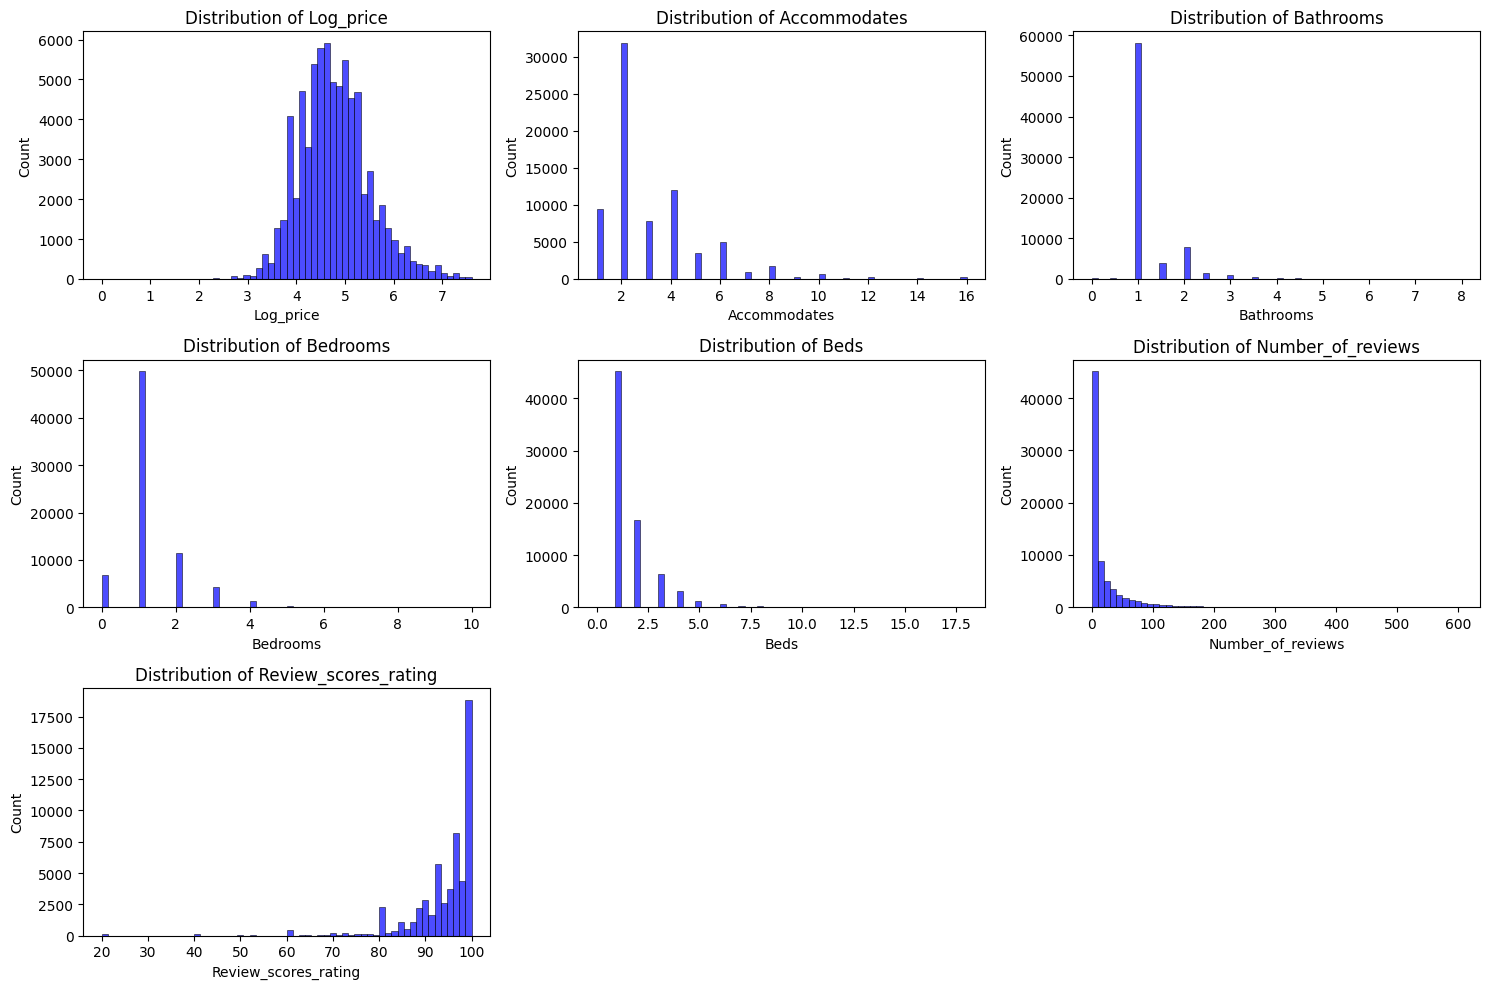

In [11]:
numerical_features = ['log_price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'number_of_reviews', 'review_scores_rating']
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[feature], bins=60, color='blue', alpha=0.7)
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
plt.tight_layout()

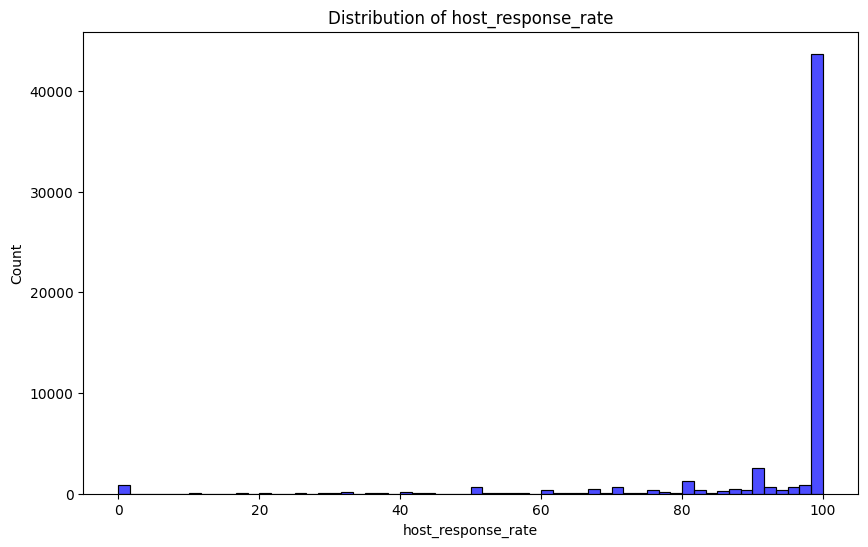

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data['host_response_rate'].str.rstrip('%').astype(float), bins=60, color='blue', alpha=0.7)
plt.title(f'Distribution of host_response_rate')
plt.xlabel('host_response_rate')
plt.ylabel('Count')
plt.show()


## Distribution of categorical features


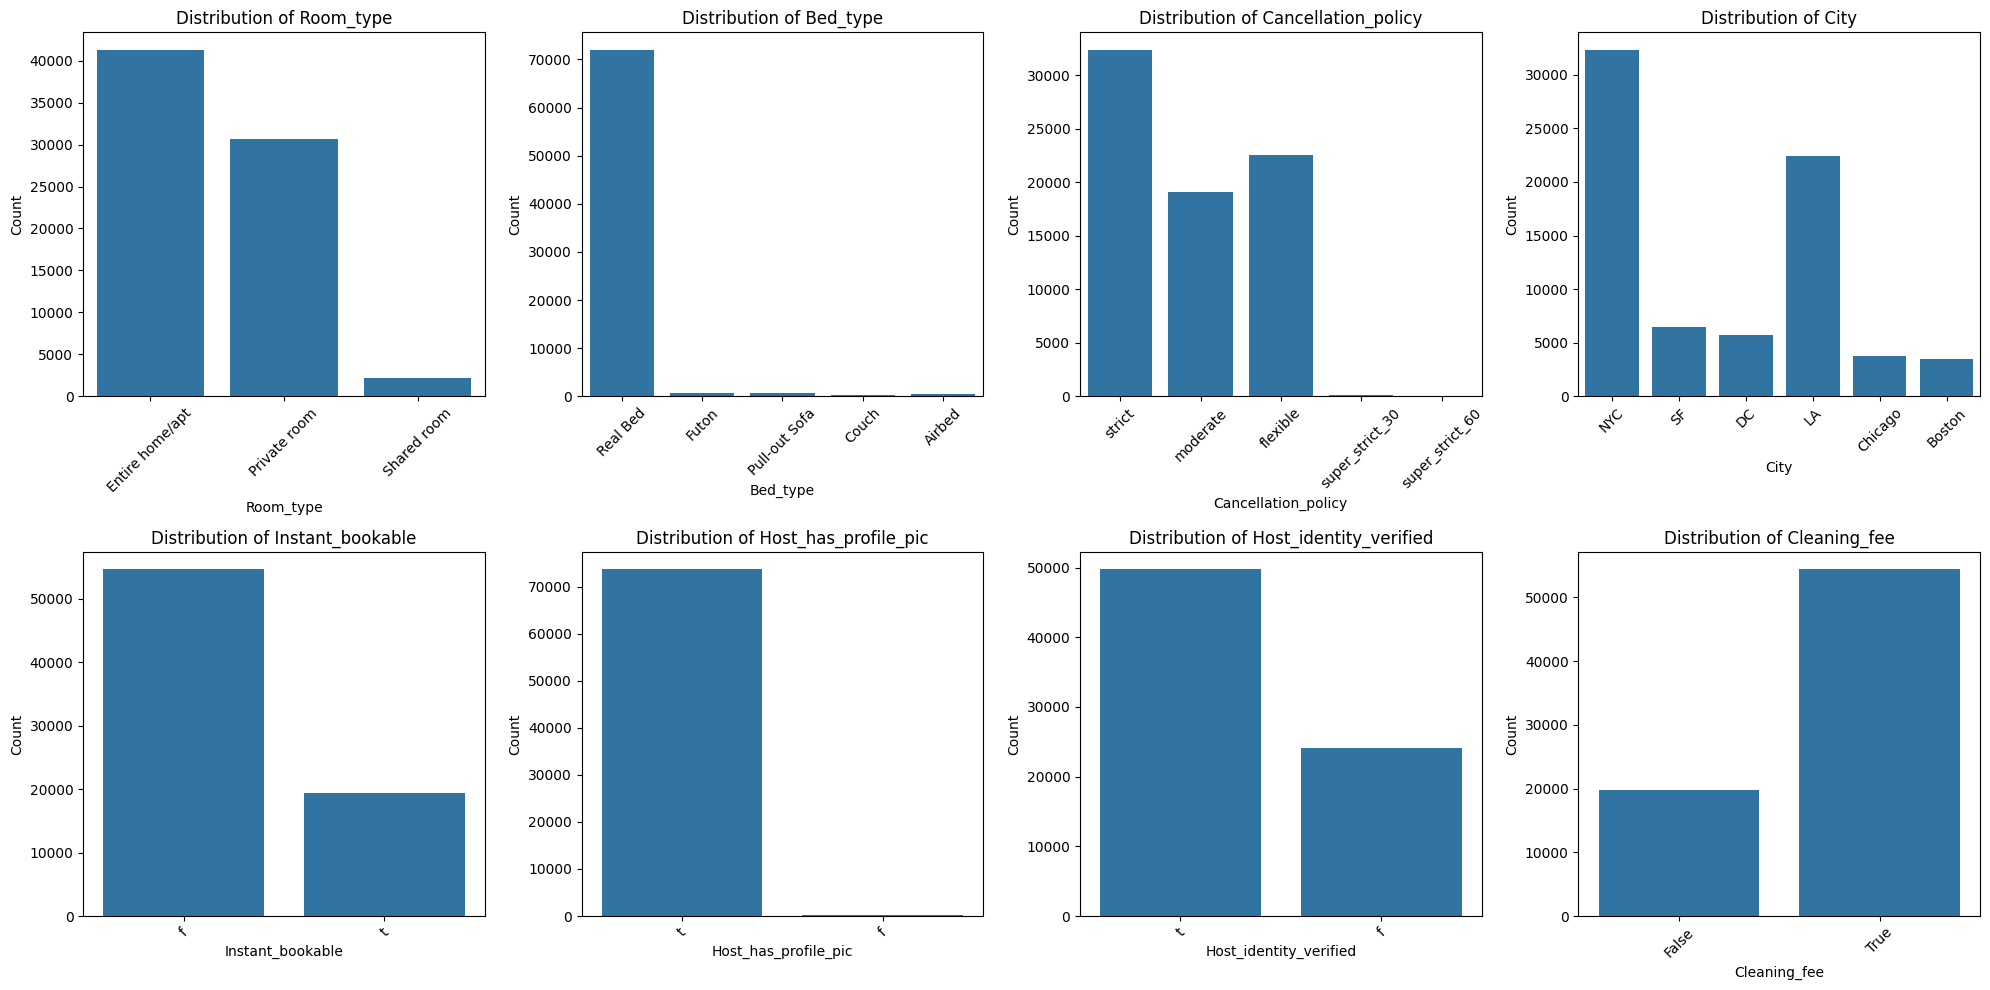

In [13]:
categorical_features = ['room_type', 'bed_type', 'cancellation_policy', 'city', 'instant_bookable', 'host_has_profile_pic', 'host_identity_verified', 'cleaning_fee']

plt.figure(figsize=(20, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 4, i)
    sns.countplot(data=data, x=feature)
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()

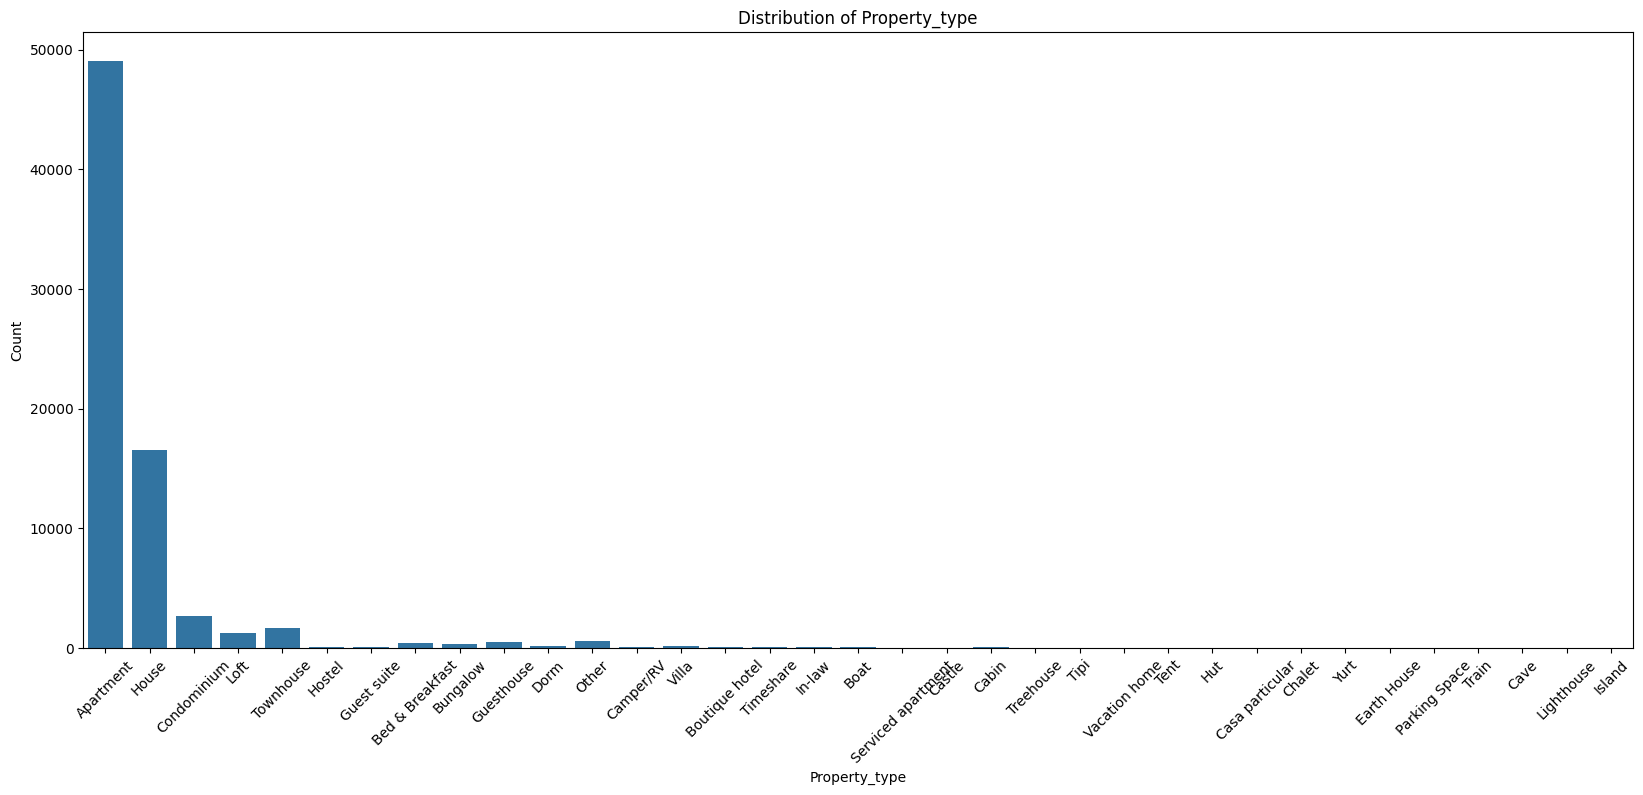

In [14]:
feature = 'property_type'
plt.figure(figsize=(20, 8))

sns.countplot(data=data, x=feature)
plt.title(f'Distribution of {feature.capitalize()}')
plt.xlabel(feature.capitalize())
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## distribution analysis in term popularity

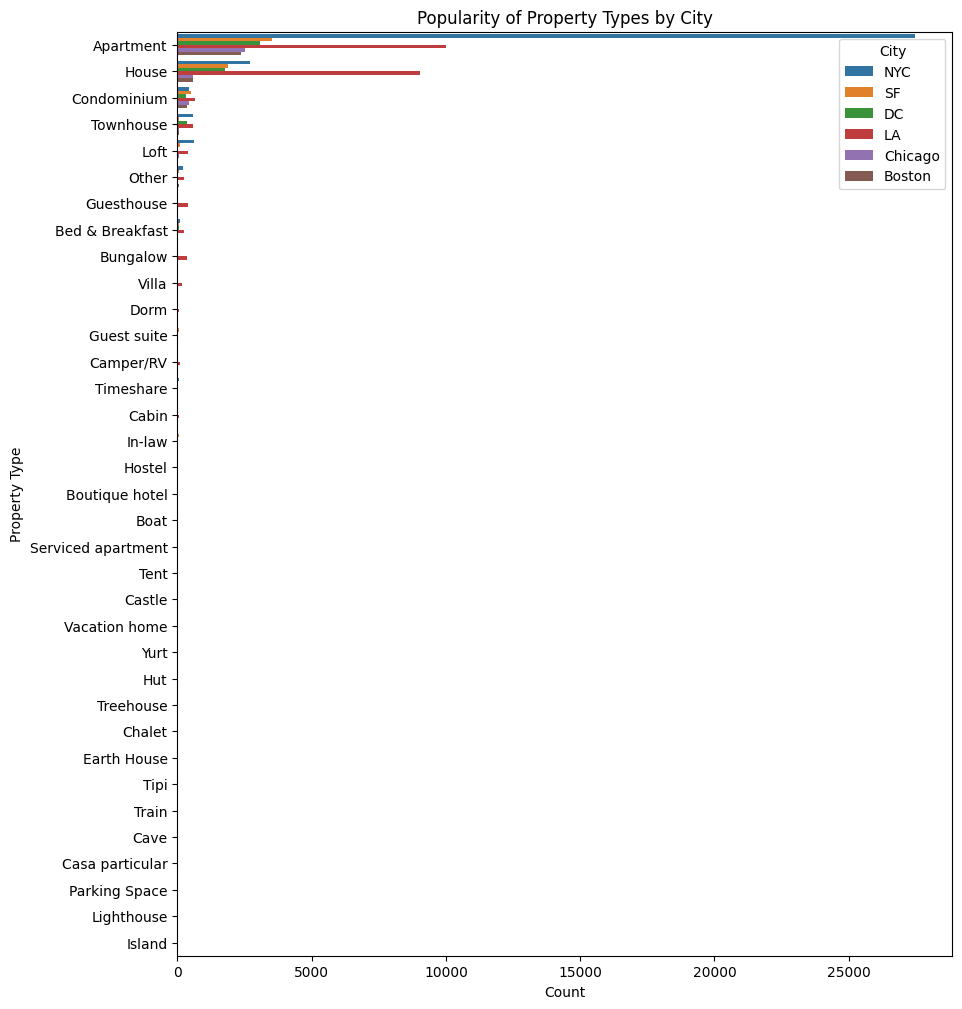

/var/folders/vh/6v9g3pc57055cj4jdb83q8pw0000gn/T/ipykernel_42809/3718576883.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='log_price', y='property_type', estimator=np.mean, order=data.groupby('property_type')['log_price'].mean().sort_values(ascending=False).index, palette='Paired')


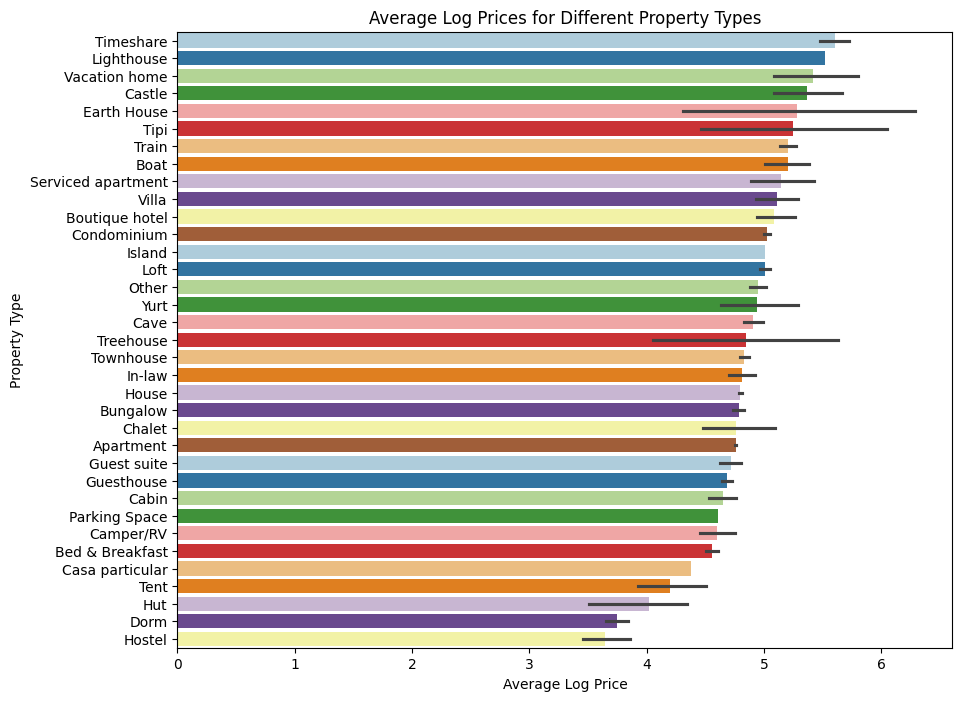

In [15]:
# Popularity of Property Types by City
plt.figure(figsize=(10, 12))
sns.countplot(data=data, y='property_type', hue='city', order=data['property_type'].value_counts().index)
plt.title('Popularity of Property Types by City')
plt.xlabel('Count')
plt.ylabel('Property Type')
plt.legend(title='City')
plt.show()

# Plot for Average Log Prices for Different Property Types
plt.figure(figsize=(10, 8))
sns.barplot(data=data, x='log_price', y='property_type', estimator=np.mean, order=data.groupby('property_type')['log_price'].mean().sort_values(ascending=False).index, palette='Paired')
plt.title('Average Log Prices for Different Property Types')
plt.xlabel('Average Log Price')
plt.ylabel('Property Type')
plt.show()




/var/folders/vh/6v9g3pc57055cj4jdb83q8pw0000gn/T/ipykernel_42809/968841579.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='room_type', y='log_price', estimator=np.mean, order=data.groupby('room_type')['log_price'].mean().sort_values(ascending=False).index, palette='Paired')


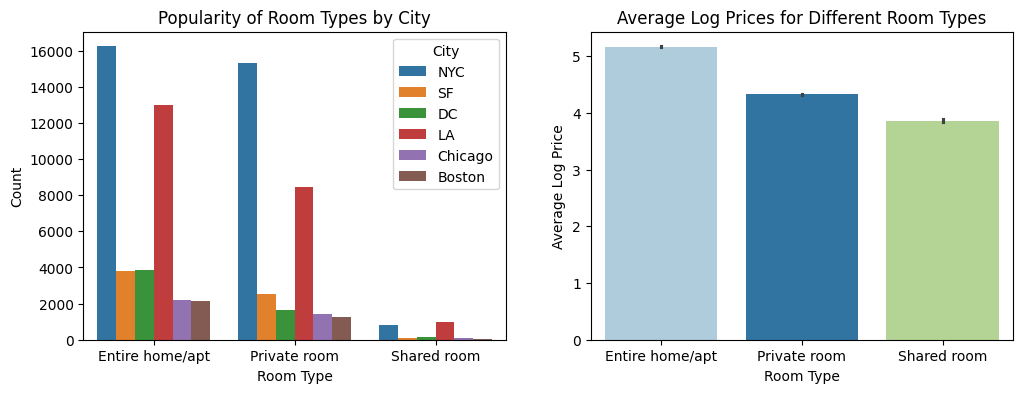

In [16]:
# Popularity of Room Types by City
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='room_type', hue='city', order=data['room_type'].value_counts().index)
plt.title('Popularity of Room Types by City')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.legend(title='City')
# Plot for Average Log Prices for Different Room Types
plt.subplot(1, 2, 2)
sns.barplot(data=data, x='room_type', y='log_price', estimator=np.mean, order=data.groupby('room_type')['log_price'].mean().sort_values(ascending=False).index, palette='Paired')
plt.title('Average Log Prices for Different Room Types')
plt.xlabel('Room Type')
plt.ylabel('Average Log Price')
plt.show()

## boxplots to identify outliers

In [17]:
data['host_response_rate'] = data['host_response_rate'].str.rstrip('%').astype(float)


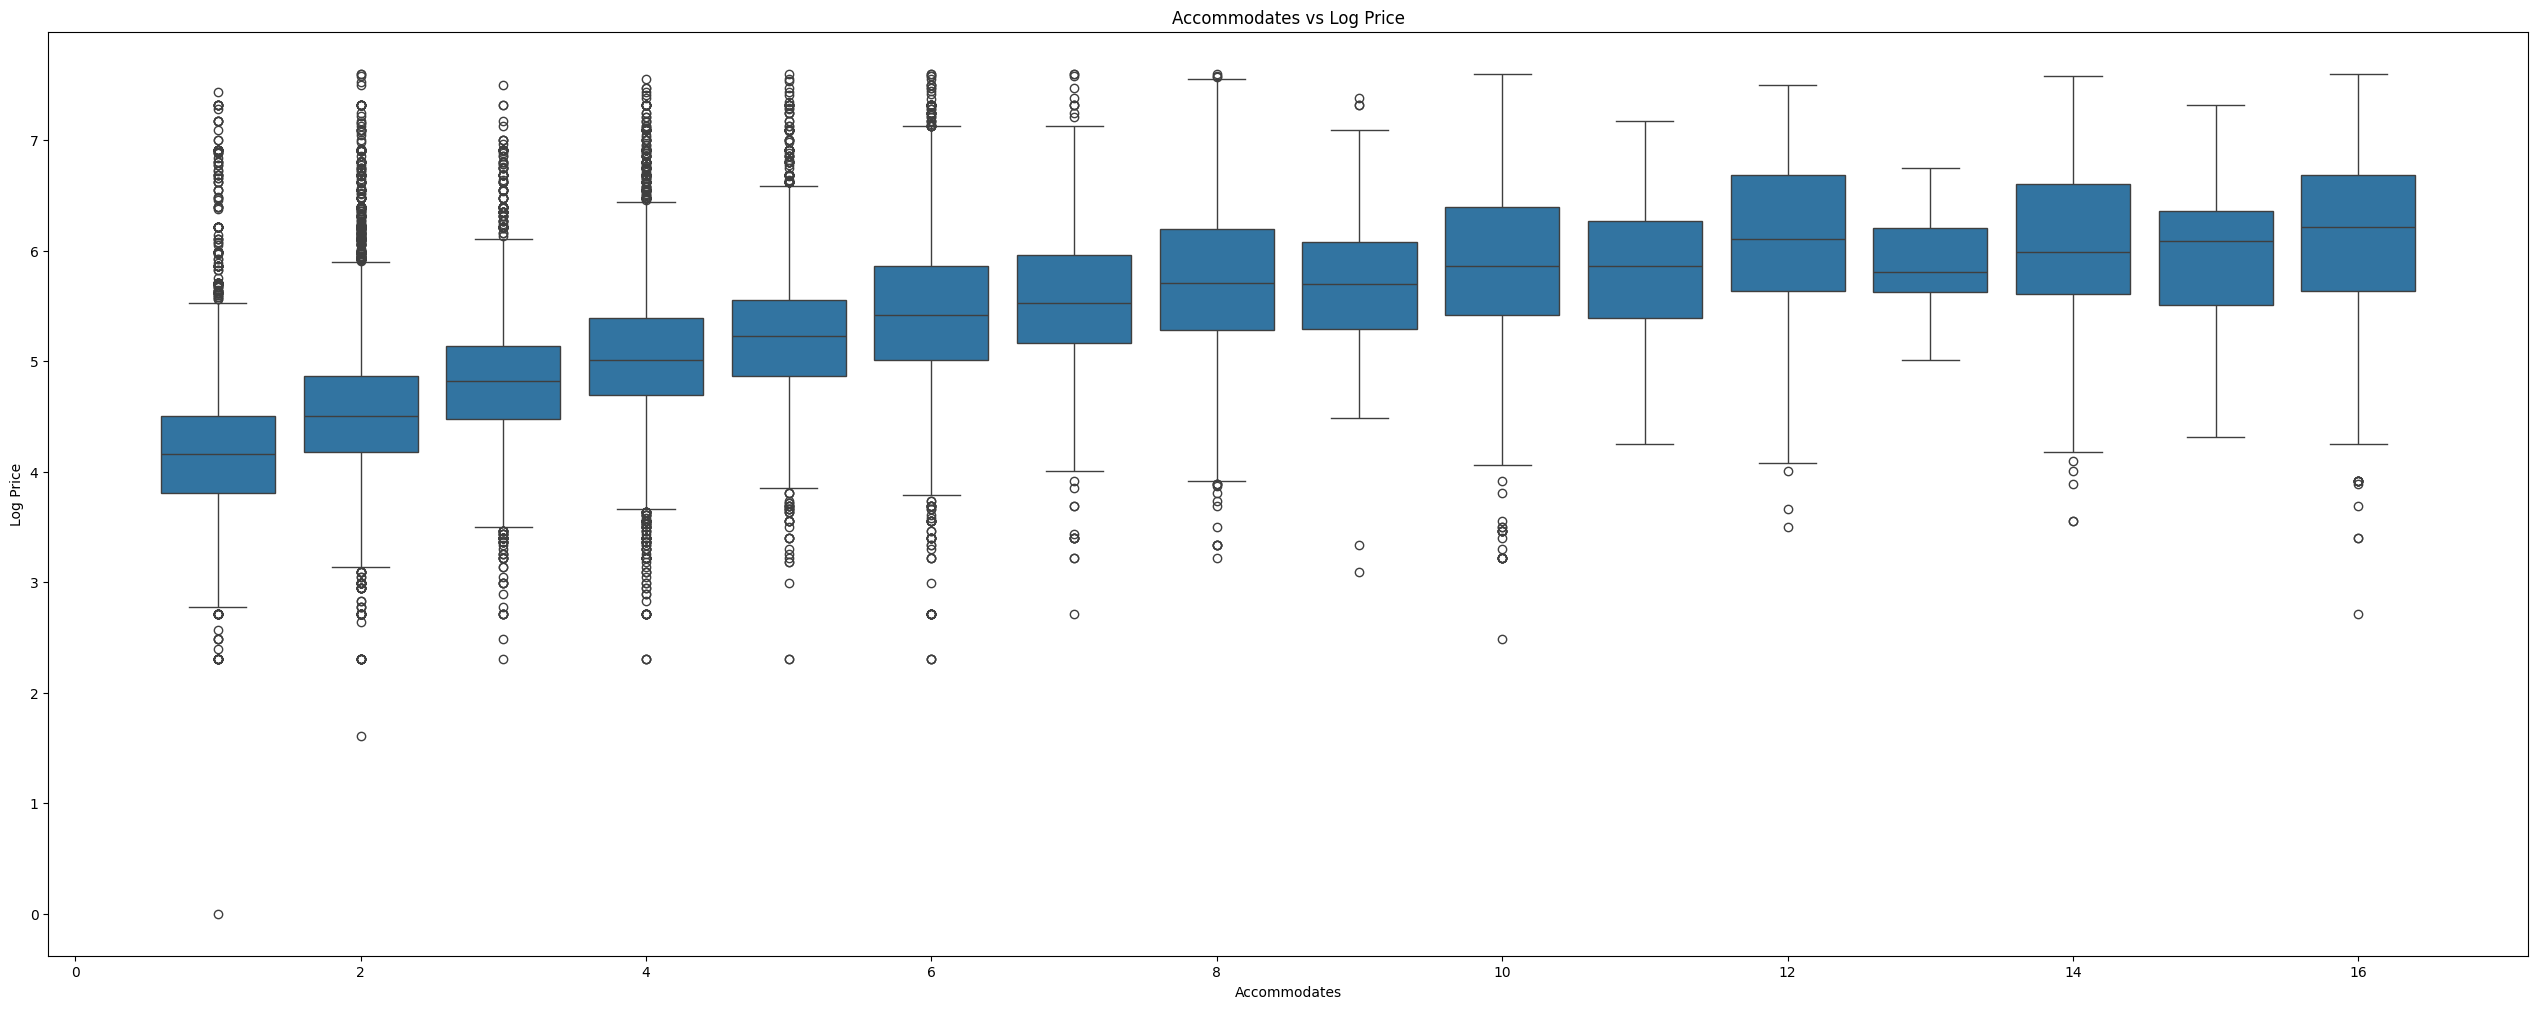

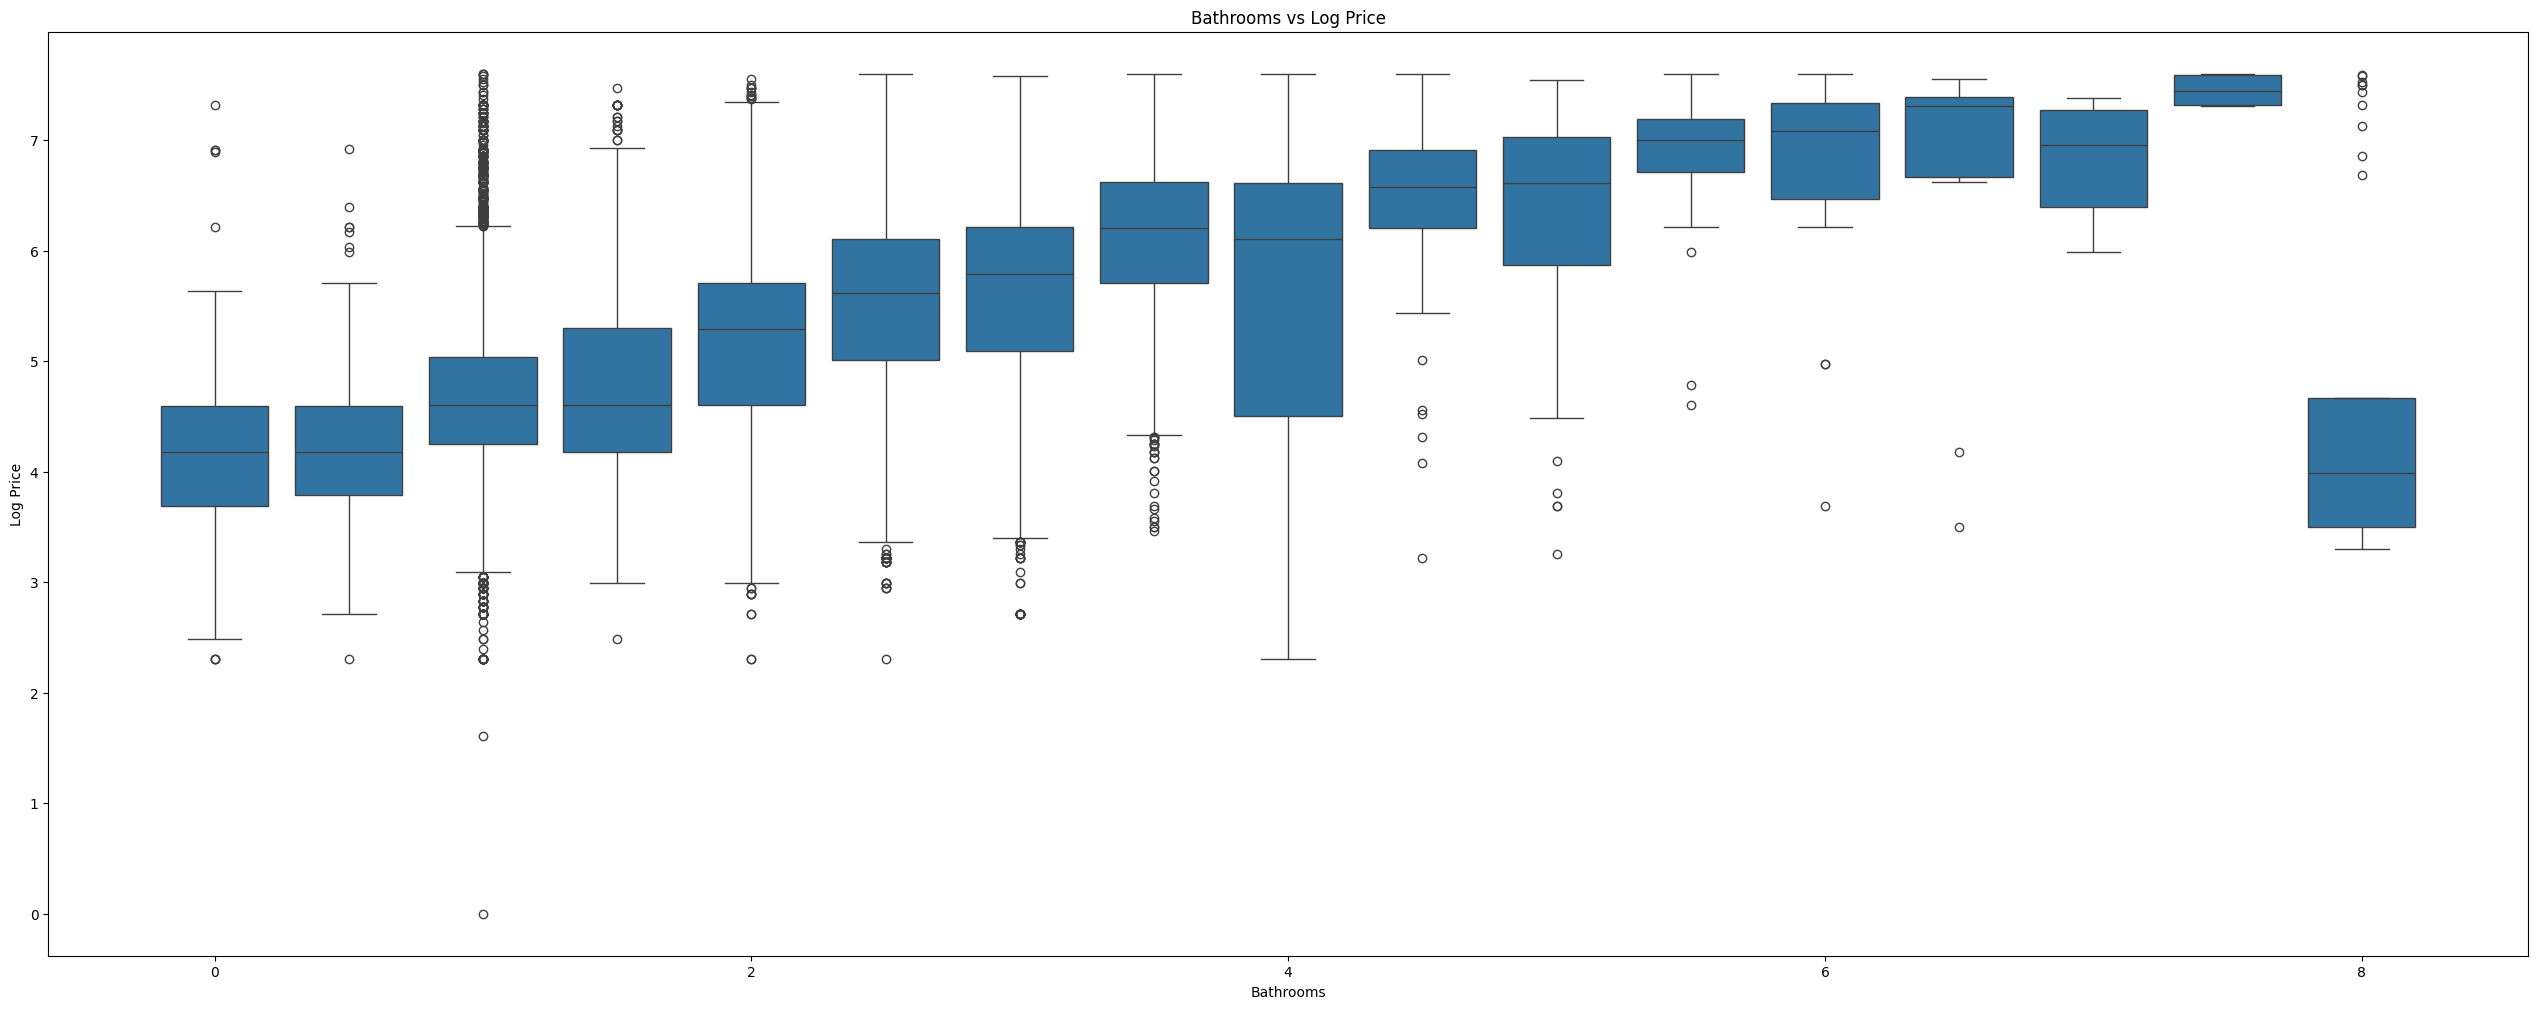

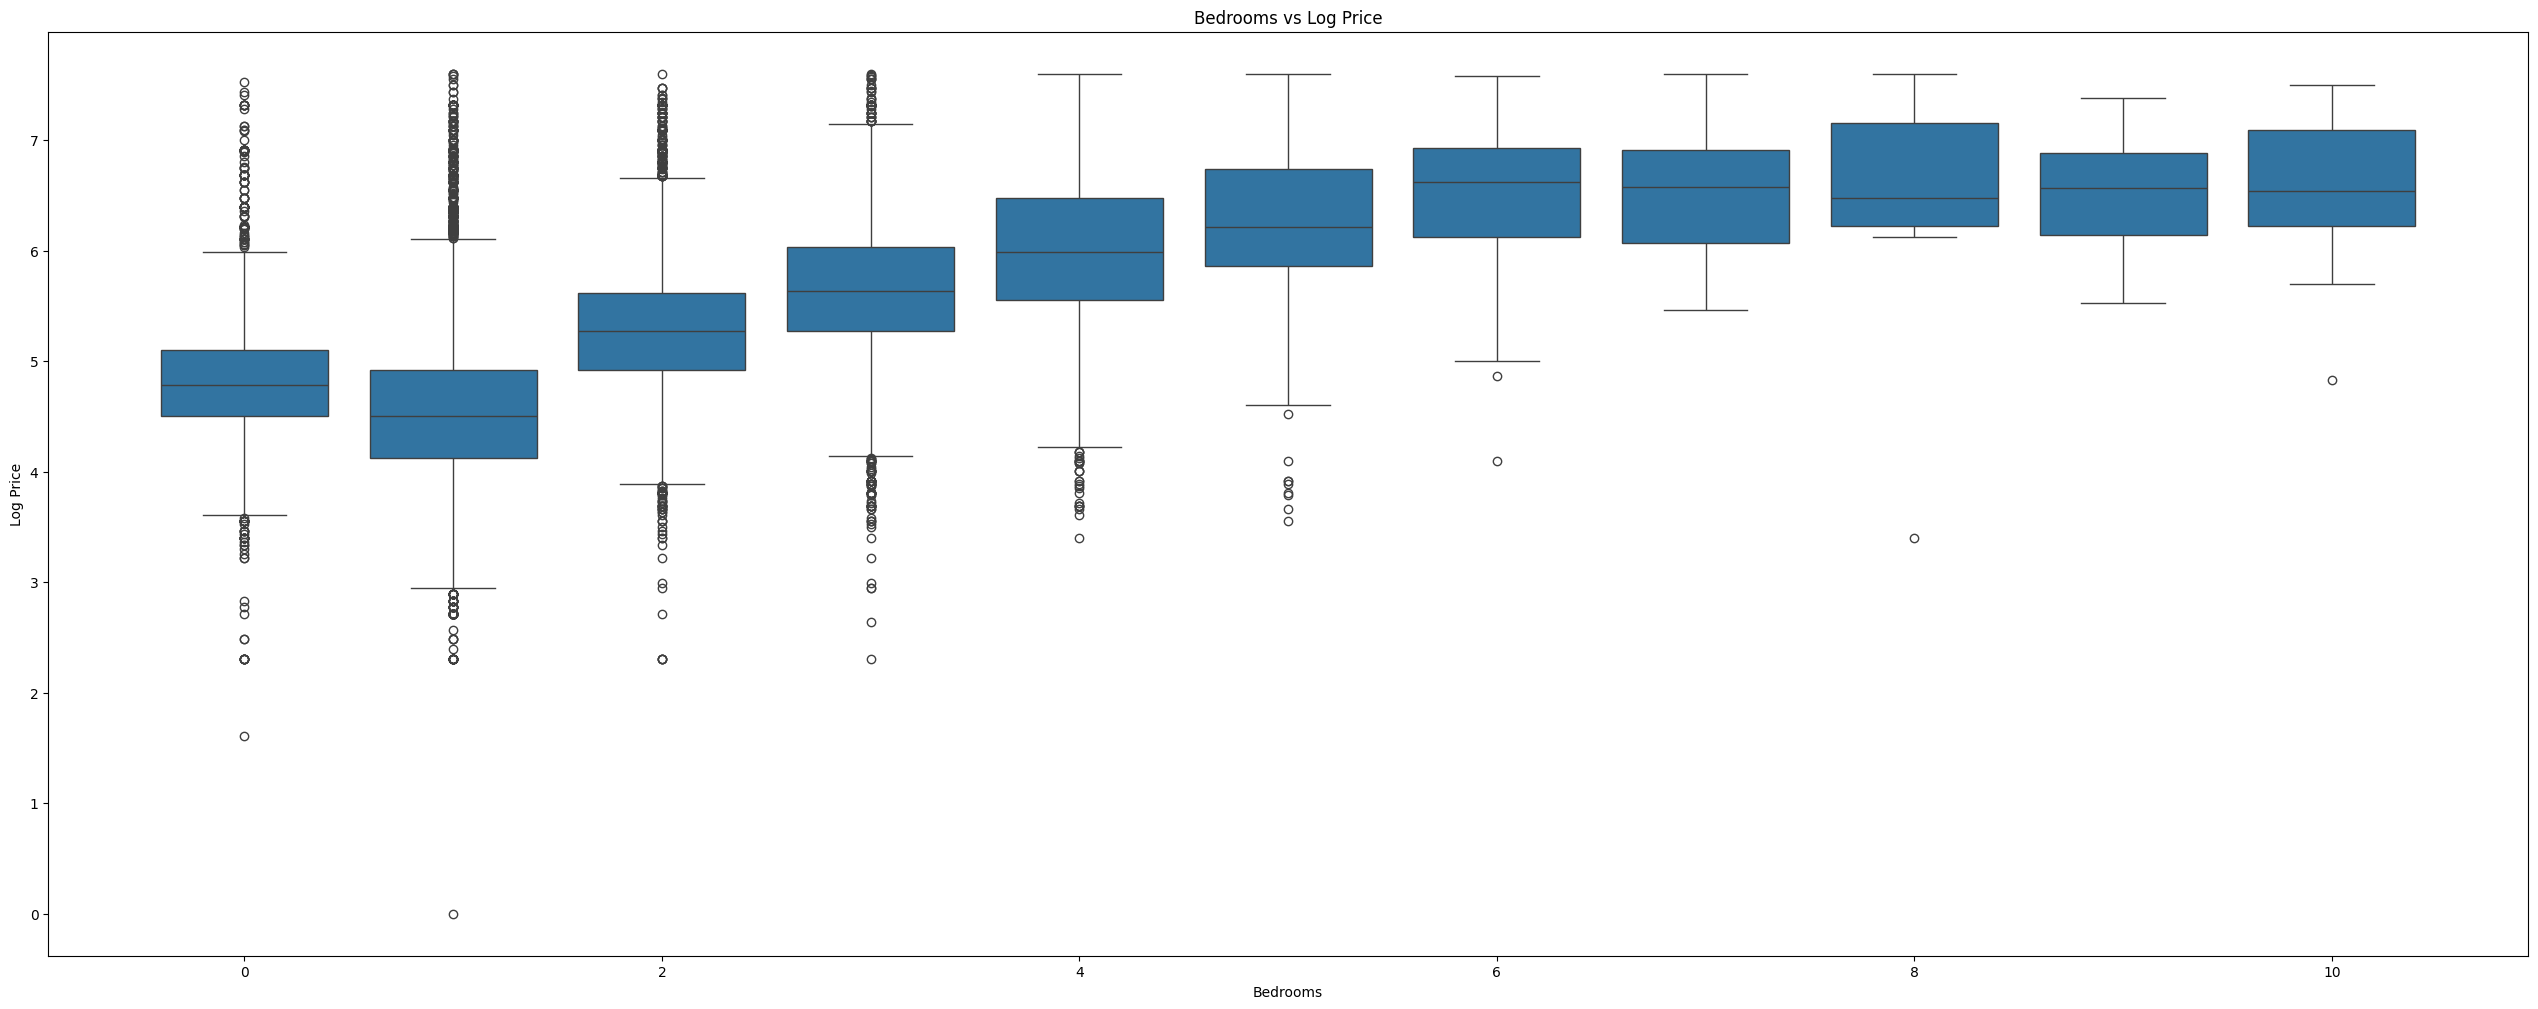

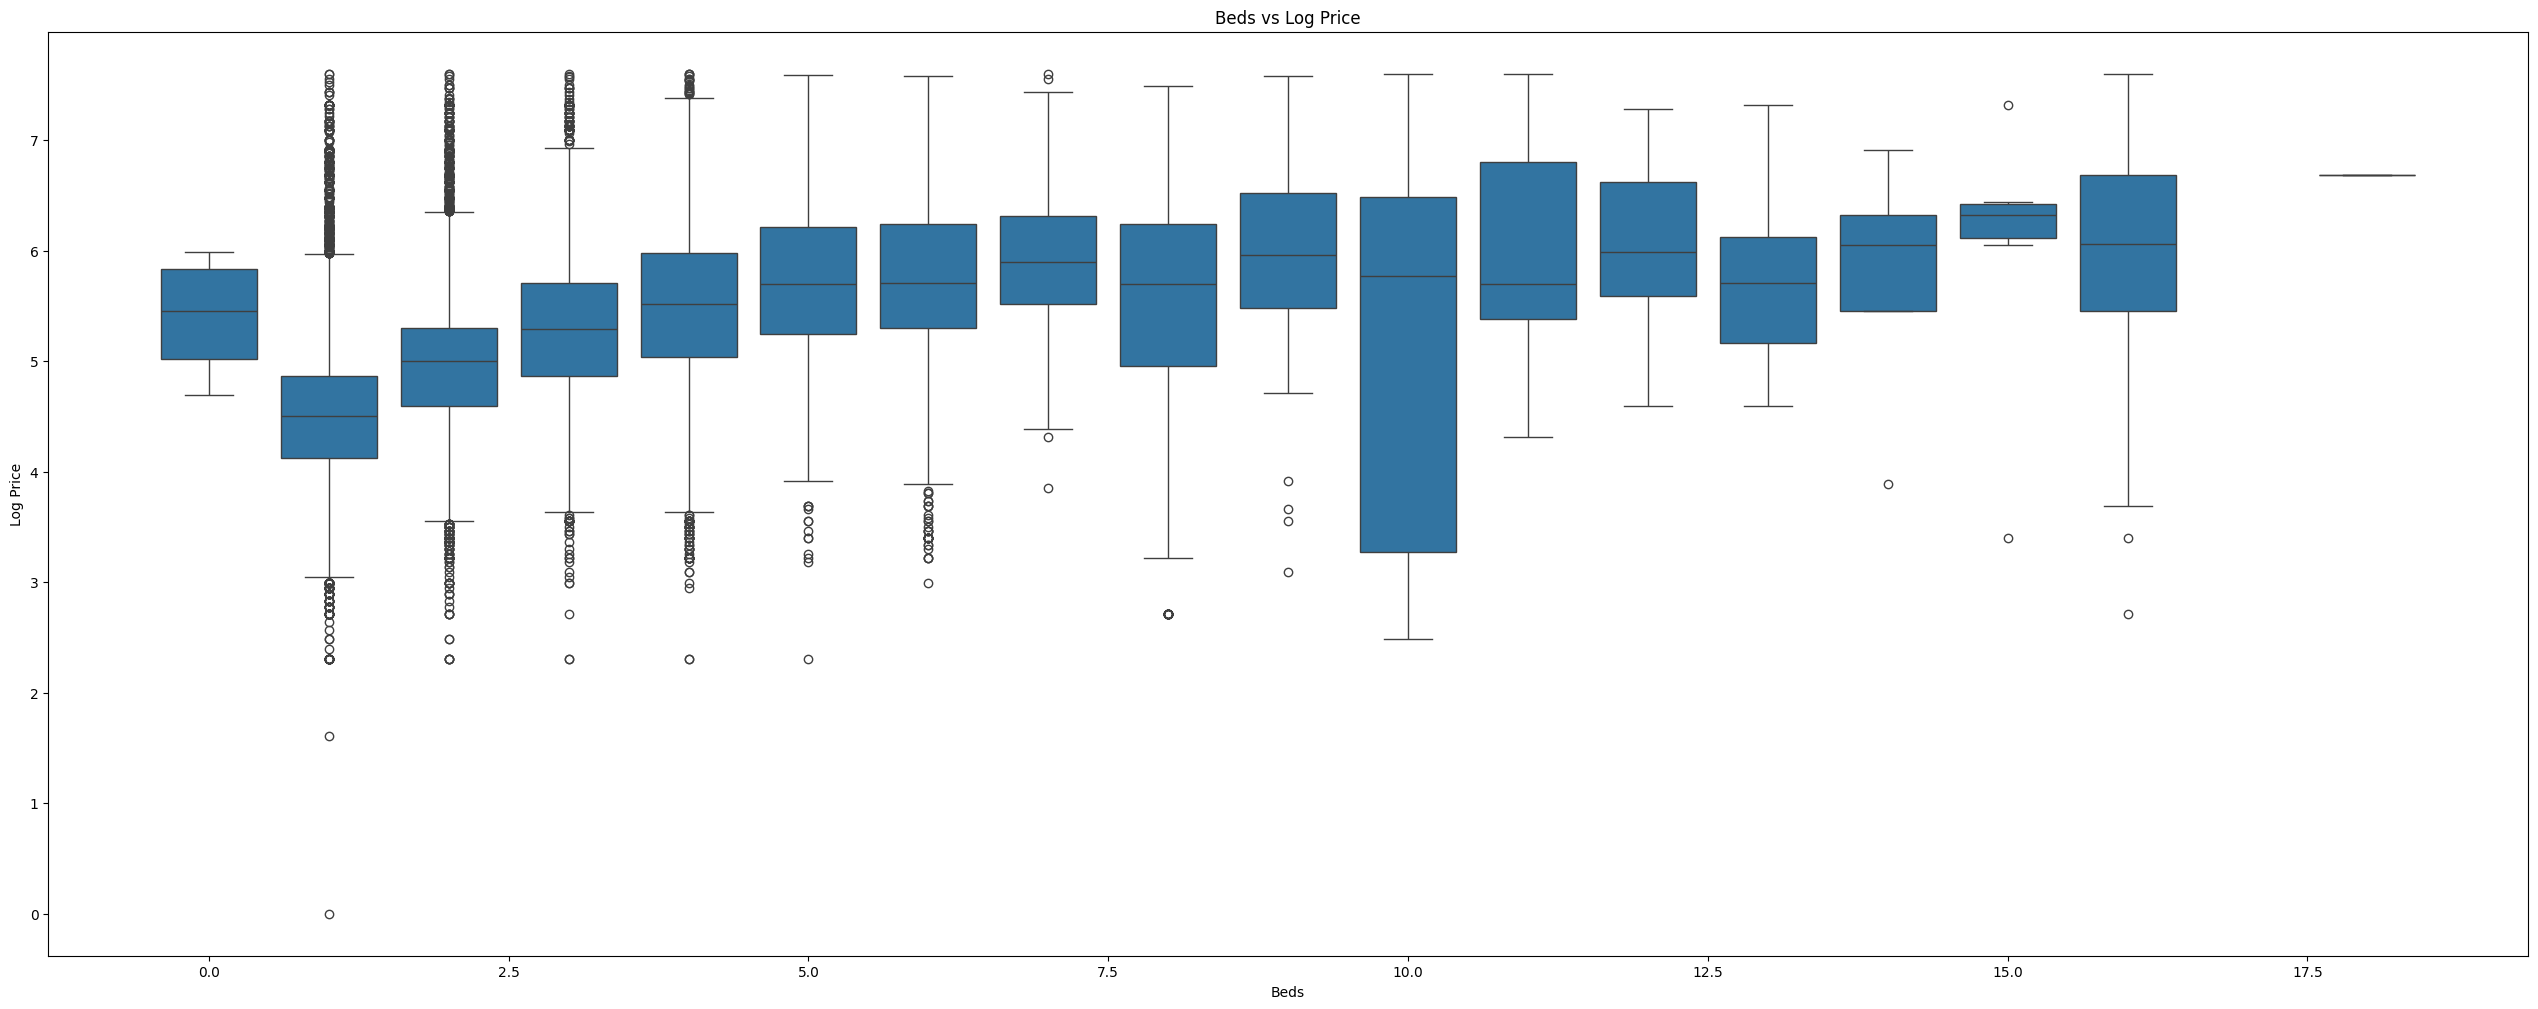

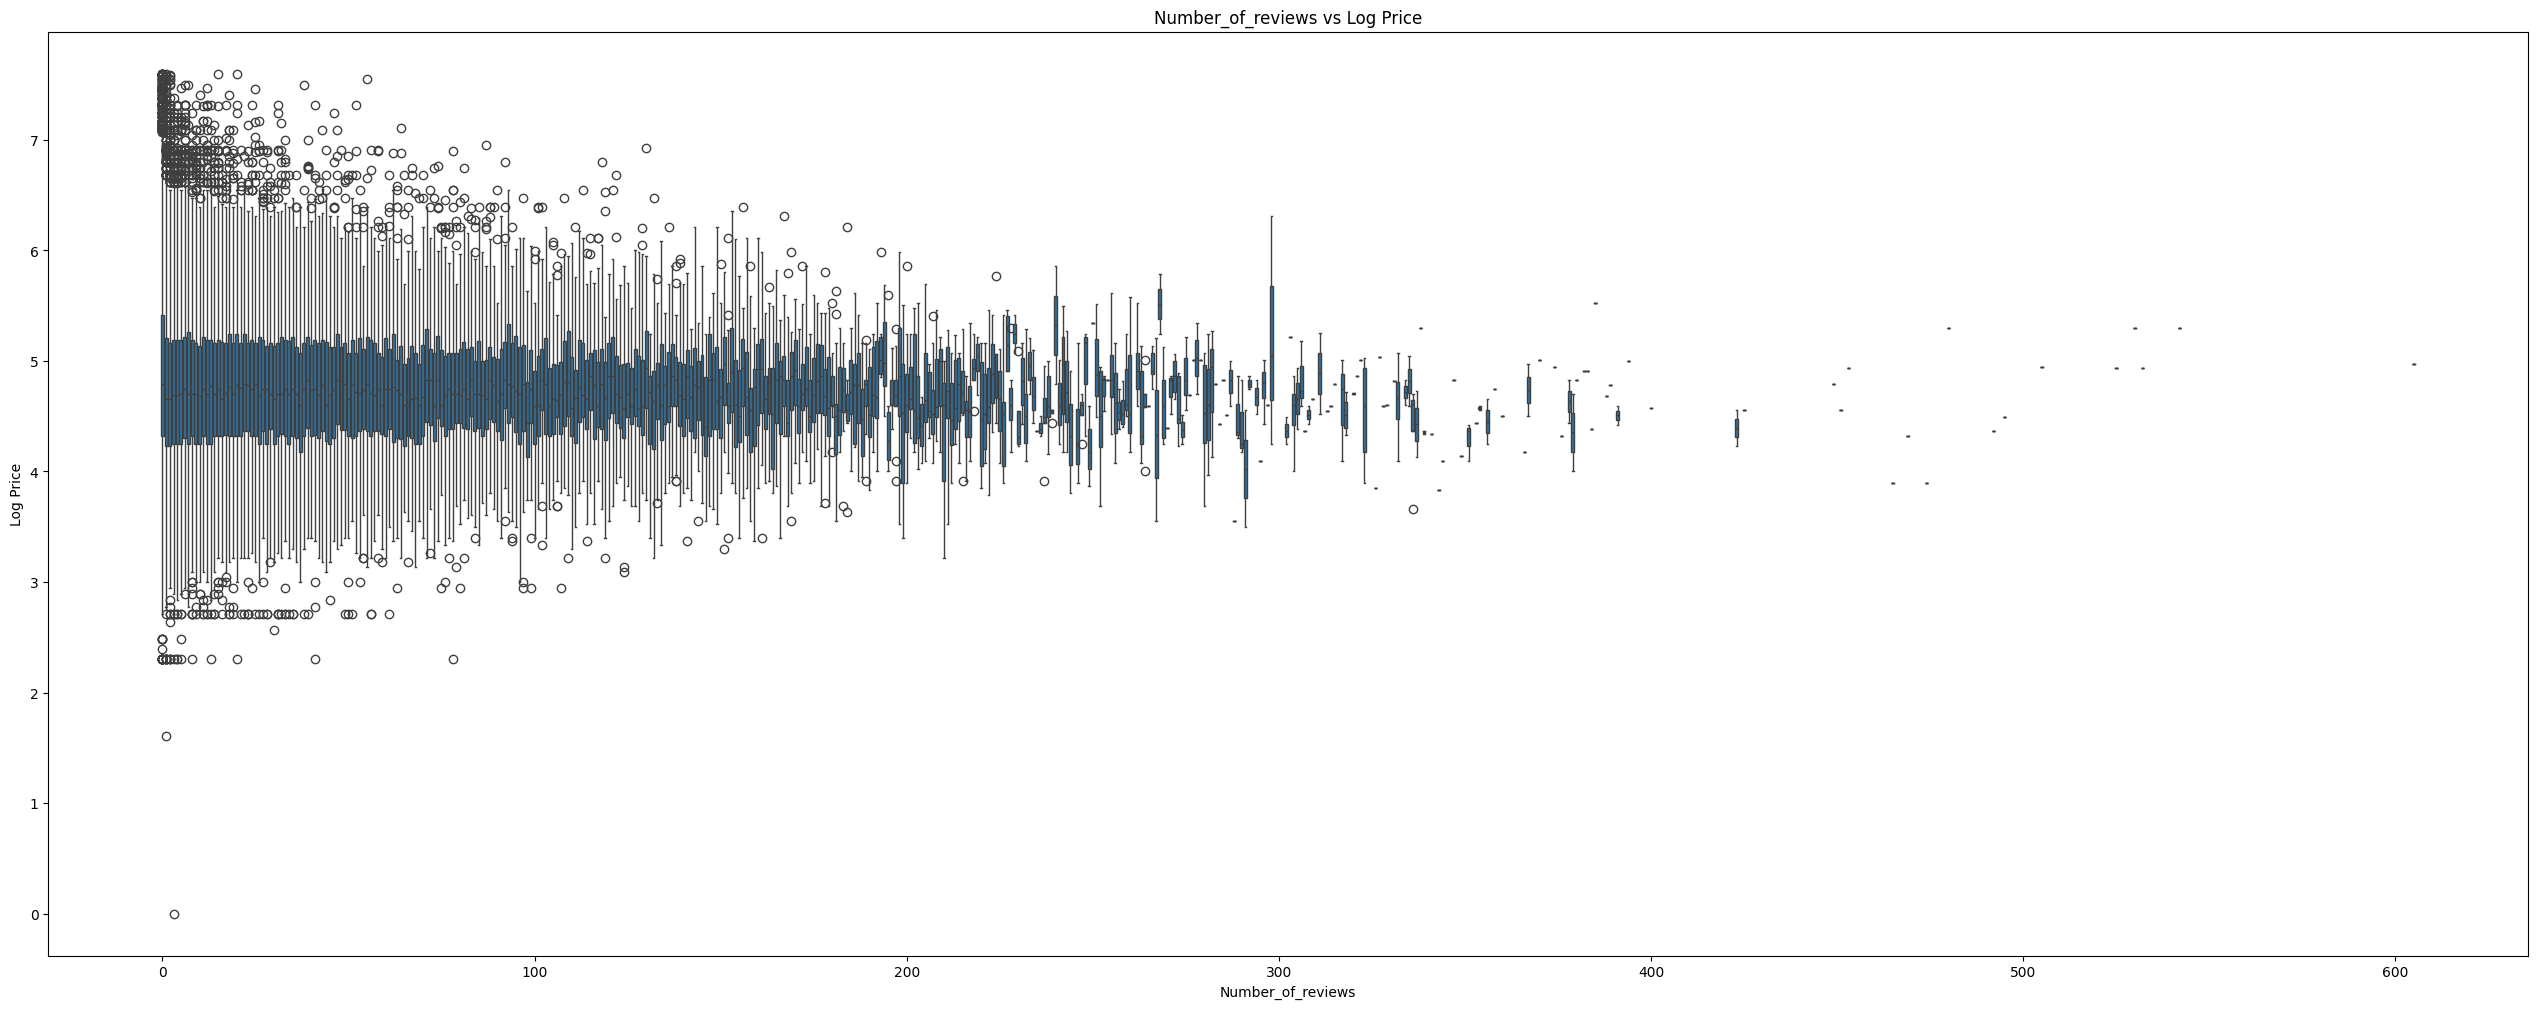

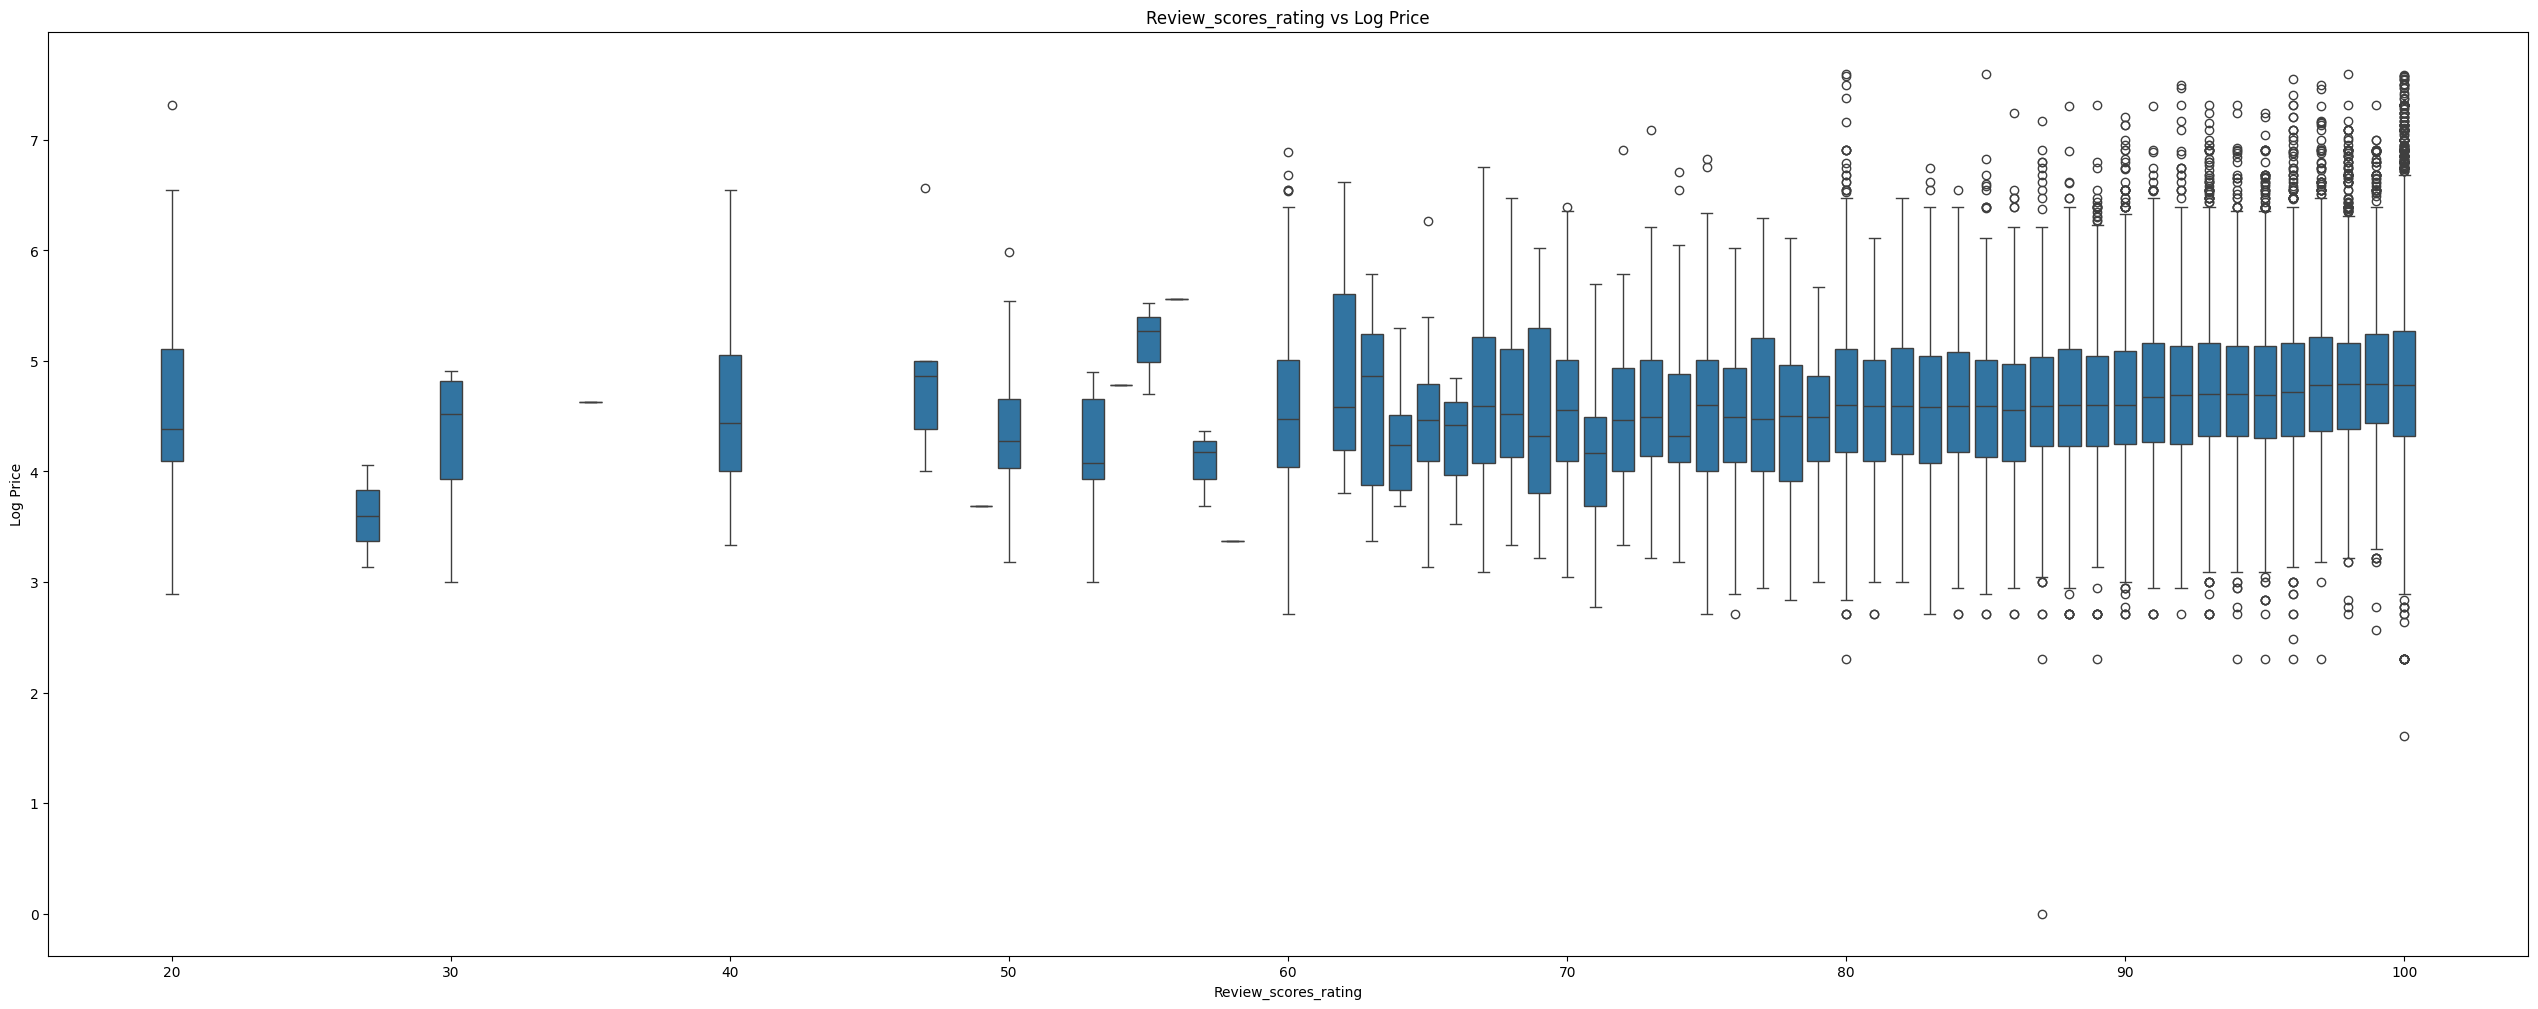

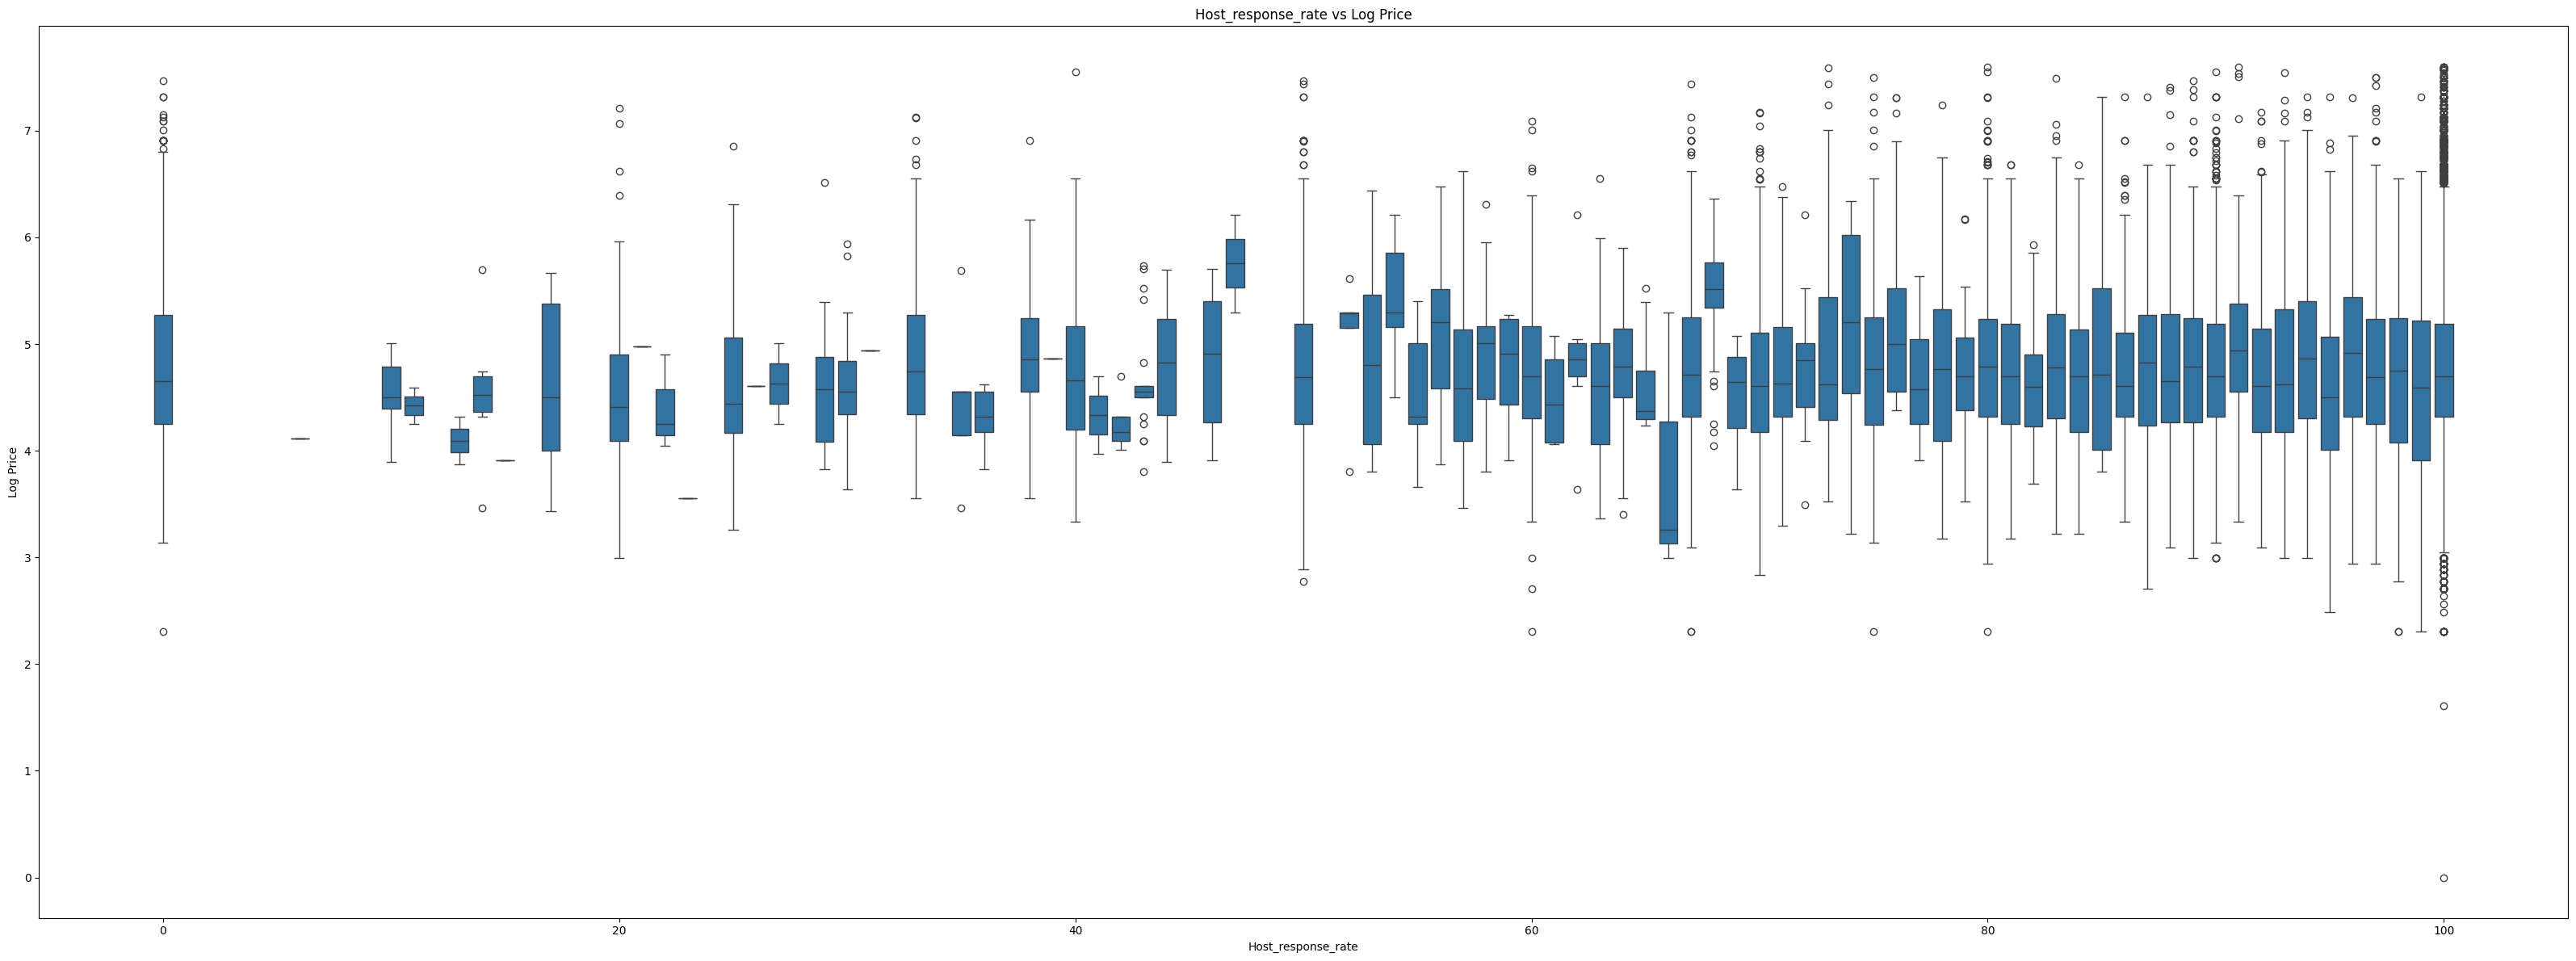

In [18]:
 numerical_columns = ['log_price', 'accommodates', 'bathrooms', 'bedrooms', 
                      'beds', 'number_of_reviews', 'review_scores_rating', 'host_response_rate']

# # Set up subplots
# plt.figure(figsize=(24, 48))
# data[numerical_columns].boxplot()
# plt.title('Box plot of Numerical Features')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()



# Box plot for categorical features vs log_price
#plt.figure(figsize=(48, 40))

for i, feature in enumerate(numerical_columns[1:],1):
    plt.figure(figsize=(32, 12))
    sns.boxplot(x=feature, y='log_price', data=data, native_scale=1)
    plt.title(f'{feature.capitalize()} vs Log Price')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Log Price')
    plt.xticks(rotation=0)
    
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

outliers are observable. 
it is obvious that there is a general growth of the average price as the numbers of accomodates , bedrooms, bathrooms from the above graphs

## Bivariate Analysis with the Target

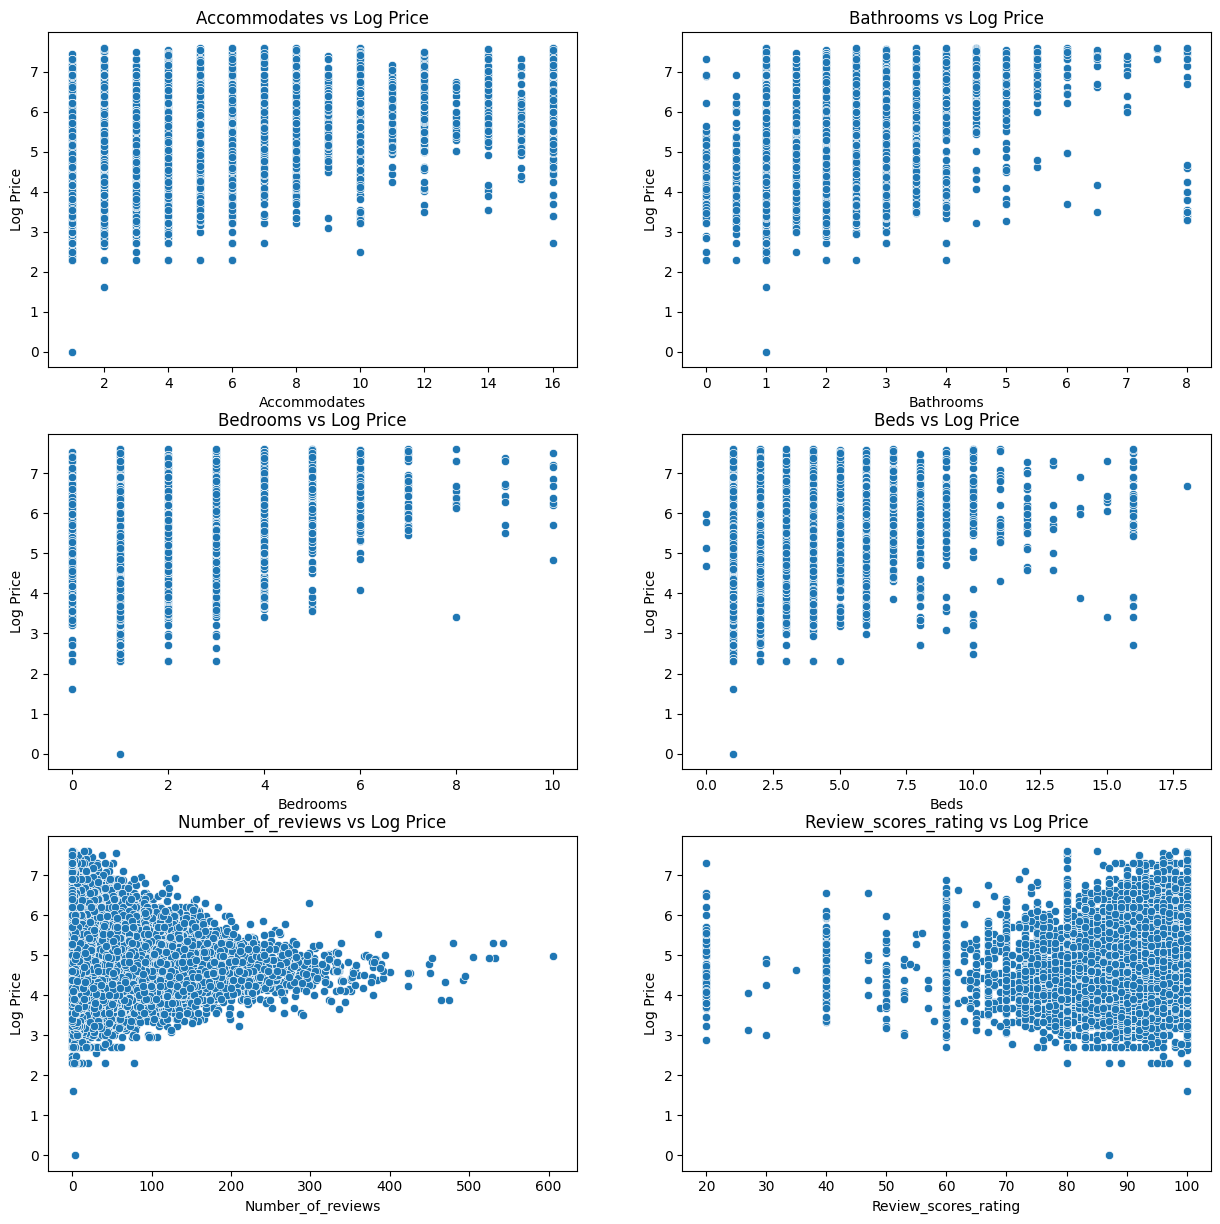

In [19]:
# Scatter plot for numerical features vs log_price
plt.figure(figsize=(15, 20))

for i, feature in enumerate(numerical_features):
    if feature != 'log_price':
        plt.subplot(4, 2, i)
        sns.scatterplot(x=data[feature], y=data['log_price'])
        plt.title(f'{feature.capitalize()} vs Log Price')
        plt.xlabel(feature.capitalize())
        plt.ylabel('Log Price')
plt.show()

no special linear relationship is noticable between numerical values and the target

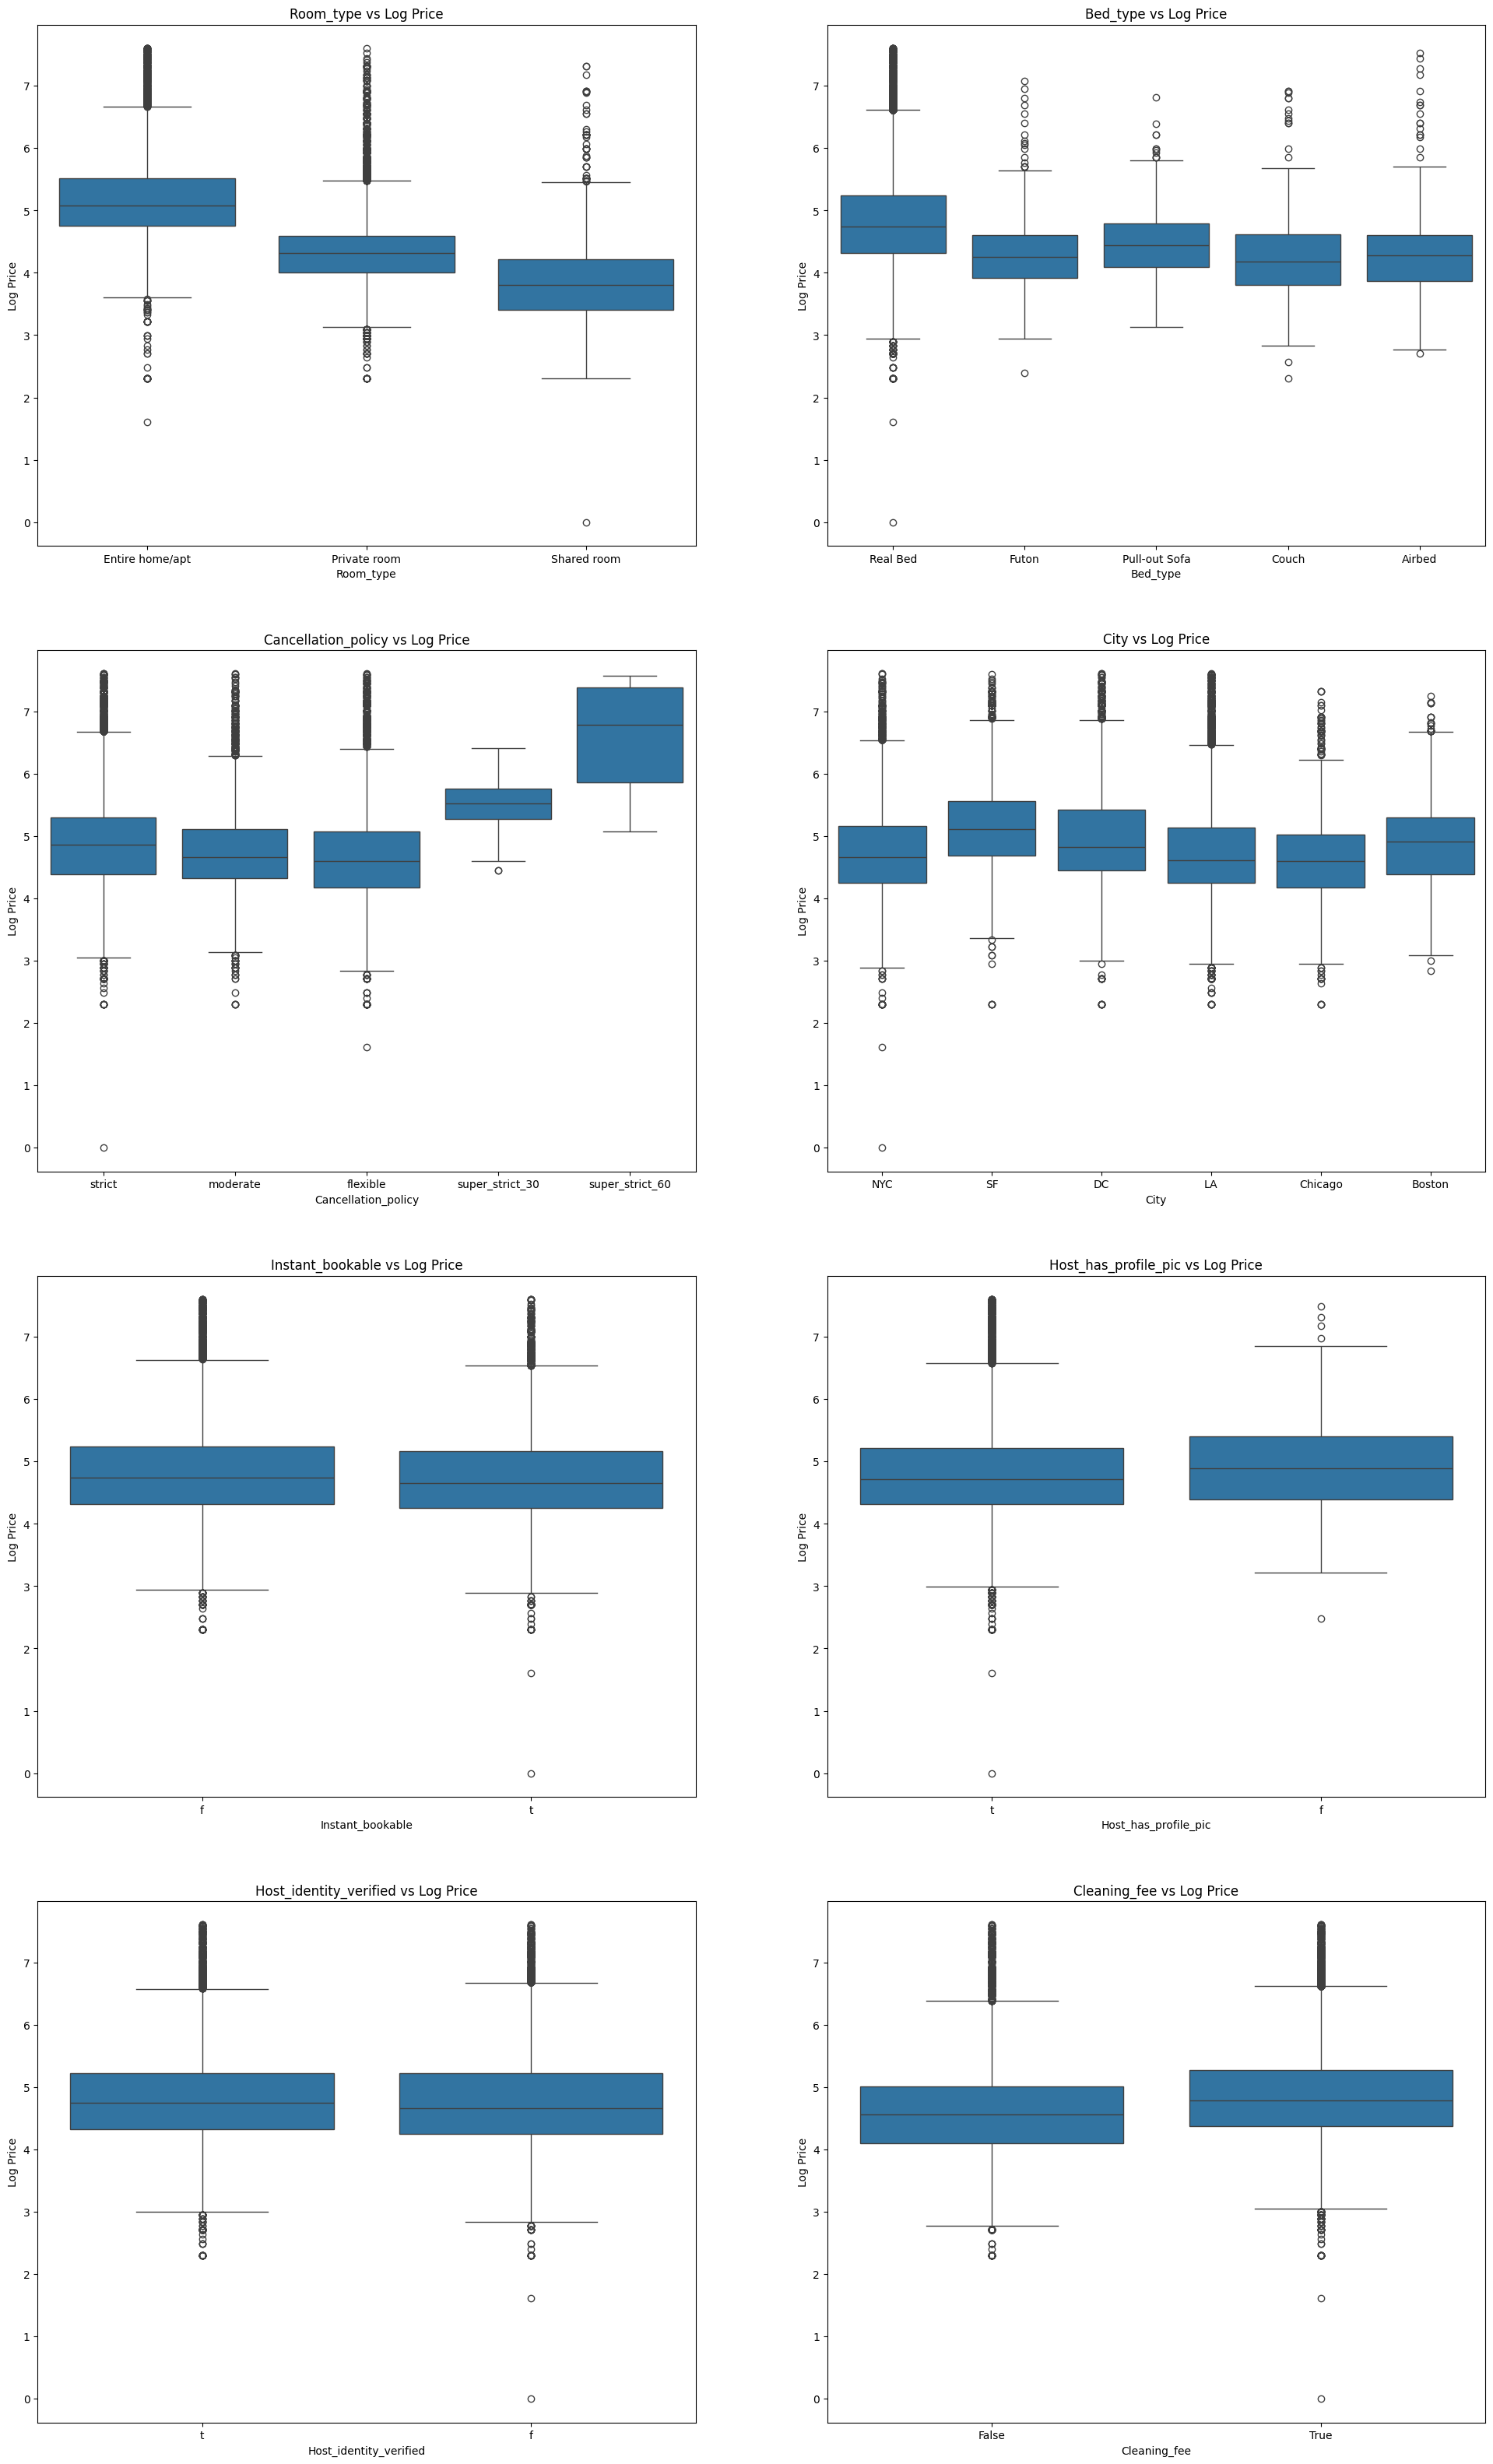

In [20]:
# Box plot for categorical features vs log_price
plt.figure(figsize=(24, 40))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=feature, y='log_price', data=data)
    plt.title(f'{feature.capitalize()} vs Log Price')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Log Price')
    plt.xticks(rotation=0)
plt.show()

the data set contains outliers this suggest the use of a robust scaler

## Correlation analysis

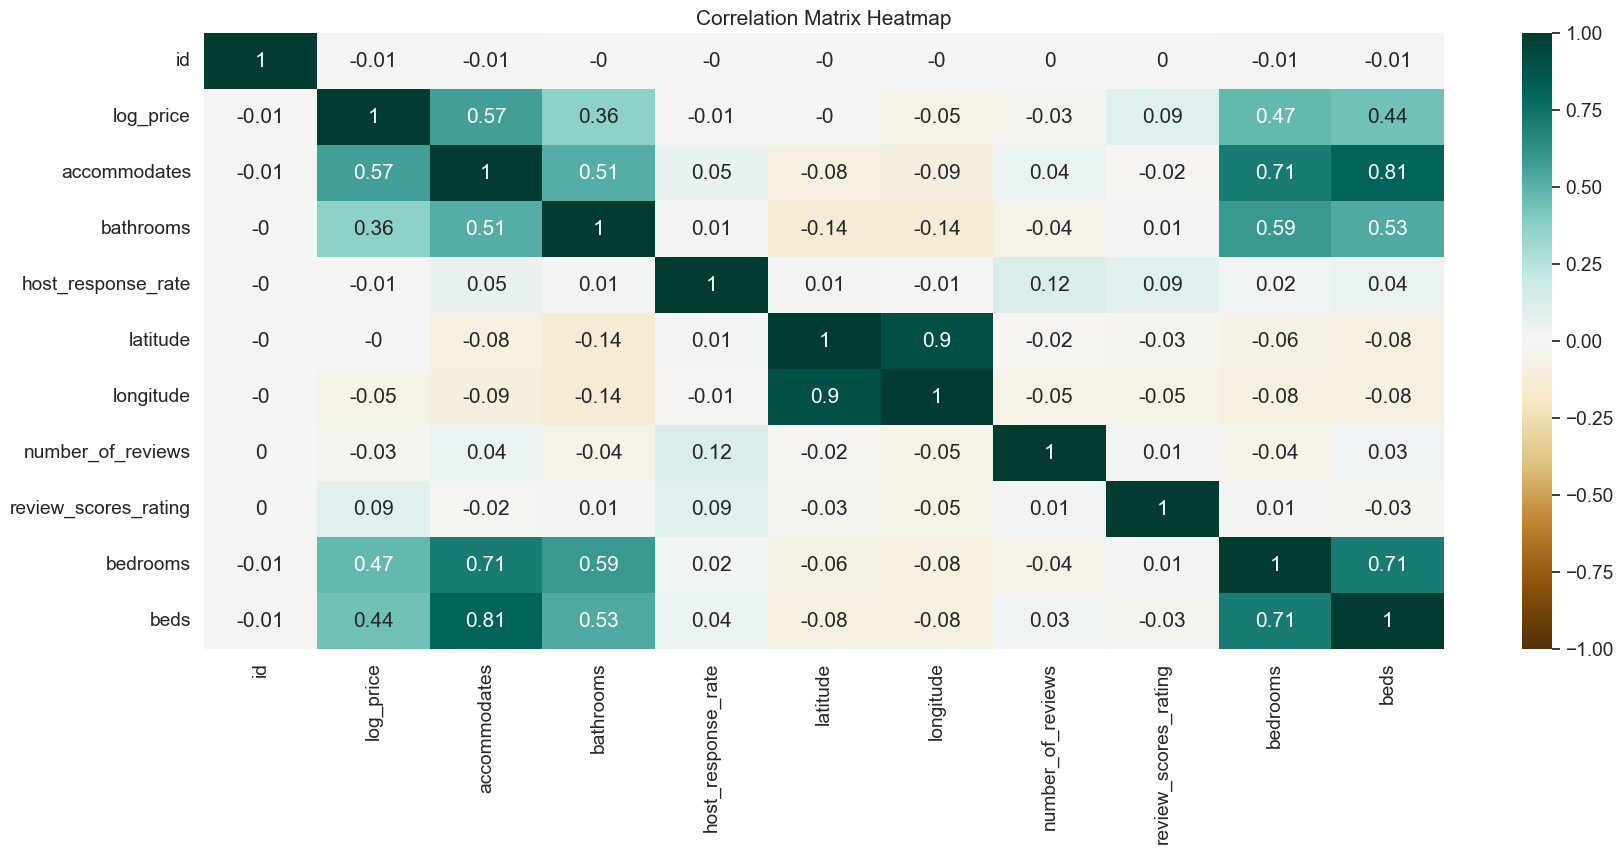

In [21]:
# Select only numeric columns for correlation analysis
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Perform correlation analysis
correlation_matrix = numeric_data.corr()

# Extract the correlation of features with the target variable log_price
target_correlation = correlation_matrix['log_price'].sort_values(ascending=False)


# Plot the heatmap
plt.figure(figsize=(20, 8))
sns.set(font_scale=1.25)
ax = sns.heatmap(correlation_matrix.round(2), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [22]:
correlation_matrix

id  log_price  accommodates  bathrooms  \
id                    1.000000  -0.007178     -0.005759  -0.003951   
log_price            -0.007178   1.000000      0.567574   0.355420   
accommodates         -0.005759   0.567574      1.000000   0.505632   
bathrooms            -0.003951   0.355420      0.505632   1.000000   
host_response_rate   -0.004782  -0.006777      0.047036   0.006535   
latitude             -0.003021  -0.002193     -0.078309  -0.137959   
longitude            -0.001379  -0.047529     -0.085160  -0.135026   
number_of_reviews     0.002945  -0.032470      0.041964  -0.041381   
review_scores_rating  0.000307   0.091219     -0.017128   0.010537   
bedrooms             -0.007521   0.473212      0.709258   0.589935   
beds                 -0.008665   0.442153      0.810801   0.525591   

                      host_response_rate  latitude  longitude  \
id                             -0.004782 -0.003021  -0.001379   
log_price                      -0.006777 -0.002193  -0.047529   
accommodates                    0.047036 -0.078309  -0.085160   
bathrooms                       0.006535 -0.137959  -0.135026   
host_response_rate              1.000000  0.008279  -0.014721   
latitude                        0.008279  1.000000   0.896065   
longitude                      -0.014721  0.896065   1.000000   
number_of_reviews               0.123065 -0.017642  -0.050009   
review_scores_rating            0.094395 -0.032858  -0.048801   
bedrooms                        0.020566 -0.059162  -0.076113   
beds                            0.041518 -0.080294  -0.082150   

                      number_of_reviews  review_scores_rating  bedrooms  \
id                             0.002945              0.000307 -0.007521   
log_price                     -0.032470              0.091219  0.473212   
accommodates                   0.041964             -0.017128  0.709258   
bathrooms                     -0.041381              0.010537  0.589935   
host_response_rate             0.123065              0.094395  0.020566   
latitude                      -0.017642             -0.032858 -0.059162   
longitude                     -0.050009             -0.048801 -0.076113   
number_of_reviews              1.000000              0.011708 -0.035149   
review_scores_rating           0.011708              1.000000  0.011143   
bedrooms                      -0.035149              0.011143  1.000000   
beds                           0.031109             -0.027330  0.709416   

                          beds  
id                   -0.008665  
log_price             0.442153  
accommodates          0.810801  
bathrooms             0.525591  
host_response_rate    0.041518  
latitude             -0.080294  
longitude            -0.082150  
number_of_reviews     0.031109  
review_scores_rating -0.027330  
bedrooms              0.709416  
beds                  1.000000

#### Features that are Correlated Between Them:
- **Accommodates and Beds**: Correlation = 0.810801
- **Accommodates and Bedrooms**: Correlation = 0.709258
- **Bedrooms and Beds**: Correlation = 0.709416
- **Accommodates and Bathrooms**: Correlation = 0.505632
- **Bathrooms and Bedrooms**: Correlation = 0.589935
- **Latitude and Longitude**: Correlation = 0.896065

These features show a high degree of correlation with each other, indicating that they tend to increase or decrease together.

#### Features with Strong Correlation with the Target (log_price):
- **Accommodates**: Correlation = 0.567574
- **Bedrooms**: Correlation = 0.473212
- **Bathrooms**: Correlation = 0.355420
- **Beds**: Correlation = 0.442153

These features have a strong positive correlation with `log_price`, suggesting that properties with more accommodations, bedrooms, bathrooms, and beds generally have higher prices.

#### Correlation Method Used:
- The **Pearson correlation coefficient** was used. This method measures the linear correlation between two variables, providing a value between -1 and 1, where:
The Pearson method is chosen because it is widely used and effective for understanding linear relationships in continuous data, which is applicable to this dataset.

## Data Features Transformation

#### 1. Handling Missing Values

**Numerical Features**

- **bathrooms**, **bedrooms**, **beds**: 
  - **Imputation Method**: Median Imputation
  - **Reason**: Median is a robust measure unaffected by outliers; distribution is skewed.

**Categorical Features**

- **host_has_profile_pic**, **host_identity_verified**: 
  - **Imputation Method**: Mode Imputation ('f' for false)
  - **Reason**: Binary features where missing likely indicates 'no' (false).
  
- **neighbourhood**, **zipcode**:
  - **Imputation Method**: Default Imputation ('Unknown')
  - **Reason**: Ensures completeness for text fields.
  
**Text Features**

- **thumbnail_url**:
  - **Imputation Method**: Default Imputation ('No URL')
  - **Reason**: Indicates absence of a URL.

- **review_scores_rating**: 
  - **Imputation Method**: Median Imputation
  - **Reason**: Preserves central tendency.

**Date Features**

- **first_review**, **last_review**, **host_since**: 
  - **Imputation Method**: Default Imputation ('1970-01-01')
  - **Reason**: Placeholder for missing dates.
  
#### 2. Preprocessing
### Categorical Features

- **property_type**: One-Hot Encoding
- **room_type**: One-Hot Encoding
- **bed_type**: One-Hot Encoding
- **cancellation_policy**: One-Hot Encoding
- **city**: One-Hot Encoding
- **instant_bookable**: Binary Encoding (0/1)
- **host_has_profile_pic**: Binary Encoding (0/1)
- **host_identity_verified**: Binary Encoding (0/1)
- **cleaning_fee**: Binary Encoding (0/1)

### Numerical Features

- **id**: No transformation needed (used as an identifier, not a feature)
- **log_price**: Target variable, no transformation needed
- **accommodates**, **bathrooms**, **bedrooms**, **beds**, **number_of_reviews**, **review_scores_rating**: Standardization
- **latitude**, **longitude**: No transformation needed

### Text Features

- **zipcode**: Frequency Encoding
- **host_response_rate**: Remove the '%' sign, convert to float, and Standardization
- **amenities**, **description** Tokenization and TF-IDF Vectorization , only consider the top max_features=8 ordered by term frequency across the corpus
- **neighbourhood**: Frequency Encoding
- **thumbnail_url**: No transformation needed (not typically used as a feature, will be dropped)

### Date Features

- **first_review**, **last_review**, **host_since**: Extract year, month, day; label encoding for month

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer


In [24]:
# Handling missing values
data['bathrooms'].fillna(data['bathrooms'].median(), inplace=True)
data['bedrooms'].fillna(data['bedrooms'].median(), inplace=True)
data['beds'].fillna(data['beds'].median(), inplace=True)
data['host_has_profile_pic'].fillna('inplace', inplace=True)
data['host_identity_verified'].fillna('False', inplace=True)
data['host_response_rate'].fillna(0, inplace=True)
data['neighbourhood'].fillna('Unknown', inplace=True)
data['review_scores_rating'].fillna(data['review_scores_rating'].median(), inplace=True)
data['thumbnail_url'].fillna('No URL', inplace=True)
data['zipcode'].fillna('Unknown', inplace=True)

# Fill missing date fields with a specific date (e.g., '1970-01-01') and convert to datetime
data['first_review'].fillna('1970-01-01', inplace=True)
data['last_review'].fillna('1970-01-01', inplace=True)
data['host_since'].fillna('1970-01-01', inplace=True)

# One-Hot Encoding for categorical features
#categorical_features = ['property_type', 'room_type', 'bed_type', 'city']
categorical_features = ['room_type', 'bed_type', 'city']

onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)
onehot_encoded = onehot_encoder.fit_transform(data[categorical_features])
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(categorical_features))

# Label Encoding for cancellation_policy
for i in ['property_type', 'cancellation_policy']:
    label_encoder = LabelEncoder()
    data[i] = label_encoder.fit_transform(data[i])

# Binary Encoding for boolean features
binary_features = ['instant_bookable', 'host_has_profile_pic', 'host_identity_verified', 'cleaning_fee']
for feature in binary_features:
    if feature in data.columns:
        data[feature] = data[feature].replace({'t': True, 'f': False, 'true': True, 'false': False}).astype(bool).astype(int)

# Standardization for numerical features
numerical_features = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

data['host_response_rate'] = scaler.fit_transform(data[['host_response_rate']])


# Frequency Encoding for zipcode and neighbourhood
for feature in ['zipcode', 'neighbourhood']:
    if feature in data.columns:
        freq_encoding = data.groupby(feature).size() / len(data)
        data[feature + '_freq'] = data[feature].map(freq_encoding)
        data.drop(columns=[feature], inplace=True)

# TF-IDF Vectorization for text features
text_features = ['amenities', 'description']
for feature in text_features:
    if feature in data.columns:
        tfidf = TfidfVectorizer(max_features=8, stop_words='english', max_df=0.95, min_df=2)  # Adjust max_features as needed
        tfidf_matrix = tfidf.fit_transform(data[feature].fillna(''))
        tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out(), index=data.index)
        data = pd.concat([data, tfidf_df], axis=1)
        data.drop(columns=[feature], inplace=True)

# Extracting year, month, day from date features and applying label encoding for month
date_features = ['first_review', 'last_review', 'host_since']
label_encoder = LabelEncoder()

for feature in date_features:
    if feature in data.columns:
        data[feature + '_year'] = pd.to_datetime(data[feature]).dt.year
        data[feature + '_month'] = label_encoder.fit_transform(pd.to_datetime(data[feature]).dt.month)
        data[feature + '_day'] = pd.to_datetime(data[feature]).dt.day
        data.drop(columns=[feature], inplace=True)

# Standardization for day columns if needed
for feature in date_features:
    day_feature = feature + '_day'
    if day_feature in data.columns:
        data[day_feature] = scaler.fit_transform(data[[day_feature]])



# Concatenate the encoded categorical features back to the DataFrame
data_cleaned = pd.concat([data.reset_index(drop=True), onehot_encoded_df.reset_index(drop=True)], axis=1)



/var/folders/vh/6v9g3pc57055cj4jdb83q8pw0000gn/T/ipykernel_42809/136491506.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bathrooms'].fillna(data['bathrooms'].median(), inplace=True)
/var/folders/vh/6v9g3pc57055cj4jdb83q8pw0000gn/T/ipykernel_42809/136491506.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

In [25]:
# Drop original categorical columns
data_cleaned = data_cleaned.drop(columns=categorical_features)
data_cleaned = data_cleaned.drop(columns=['name','thumbnail_url'])
data_cleaned

id  log_price  property_type  accommodates  bathrooms  \
0       6901257   5.010635              0     -0.072041  -0.403569   
1       6304928   5.129899              0      1.785336  -0.403569   
2       7919400   4.976734              0      0.856648  -0.403569   
3      13418779   6.620073             17      0.392303  -0.403569   
4       3808709   4.744932              0     -0.536385  -0.403569   
...         ...        ...            ...           ...        ...   
74106  14549287   4.605170              0     -1.000730  -0.403569   
74107  13281809   5.043425              0      0.392303   1.316470   
74108  18688039   5.220356              0      0.856648  -0.403569   
74109  17045948   5.273000              0     -0.536385  -0.403569   
74110   3534845   4.852030              2      0.392303  -0.403569   

       cancellation_policy  cleaning_fee  host_has_profile_pic  \
0                        2             1                     1   
1                        2             1                     1   
2                        1             1                     1   
3                        0             1                     1   
4                        1             1                     1   
...                    ...           ...                   ...   
74106                    0             0                     1   
74107                    1             1                     1   
74108                    1             1                     1   
74109                    2             1                     1   
74110                    1             0                     1   

       host_identity_verified  host_response_rate  ...  room_type_Shared room  \
0                           1           -1.649119  ...                    0.0   
1                           0            0.671780  ...                    0.0   
2                           1            0.671780  ...                    0.0   
3                           1           -1.649119  ...                    0.0   
4                           1            0.671780  ...                    0.0   
...                       ...                 ...  ...                    ...   
74106                       1           -1.649119  ...                    0.0   
74107                       0            0.671780  ...                    0.0   
74108                       1            0.671780  ...                    0.0   
74109                       0            0.671780  ...                    0.0   
74110                       1            0.671780  ...                    0.0   

       bed_type_Couch  bed_type_Futon  bed_type_Pull-out Sofa  \
0                 0.0             0.0                     0.0   
1                 0.0             0.0                     0.0   
2                 0.0             0.0                     0.0   
3                 0.0             0.0                     0.0   
4                 0.0             0.0                     0.0   
...               ...             ...                     ...   
74106             0.0             0.0                     0.0   
74107             0.0             0.0                     0.0   
74108             0.0             0.0                     0.0   
74109             0.0             0.0                     0.0   
74110             0.0             0.0                     0.0   

       bed_type_Real Bed  city_Chicago  city_DC  city_LA  city_NYC  city_SF  
0                    1.0           0.0      0.0      0.0       1.0      0.0  
1                    1.0           0.0      0.0      0.0       1.0      0.0  
2                    1.0           0.0      0.0      0.0       1.0      0.0  
3                    1.0           0.0      0.0      0.0       0.0      1.0  
4                    1.0           0.0      1.0      0.0       0.0      0.0  
...                  ...           ...      ...      ...       ...      ...  
74106                1.0           0.0      0.0      0.0       1.0      0.0  
7

In [26]:
print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  int64  
 3   accommodates            74111 non-null  float64
 4   bathrooms               74111 non-null  float64
 5   cancellation_policy     74111 non-null  int64  
 6   cleaning_fee            74111 non-null  int64  
 7   host_has_profile_pic    74111 non-null  int64  
 8   host_identity_verified  74111 non-null  int64  
 9   host_response_rate      74111 non-null  float64
 10  instant_bookable        74111 non-null  int64  
 11  latitude                74111 non-null  float64
 12  longitude               74111 non-null  float64
 13  number_of_reviews       74111 non-null  float64
 14  review_scores_rating    74111 non-null

we have now a cleaned dataset of 88 features but it can lead to the curse of dimensionality , one way to reduce would be to use label encoding instead of one hot encoding for the original feature property

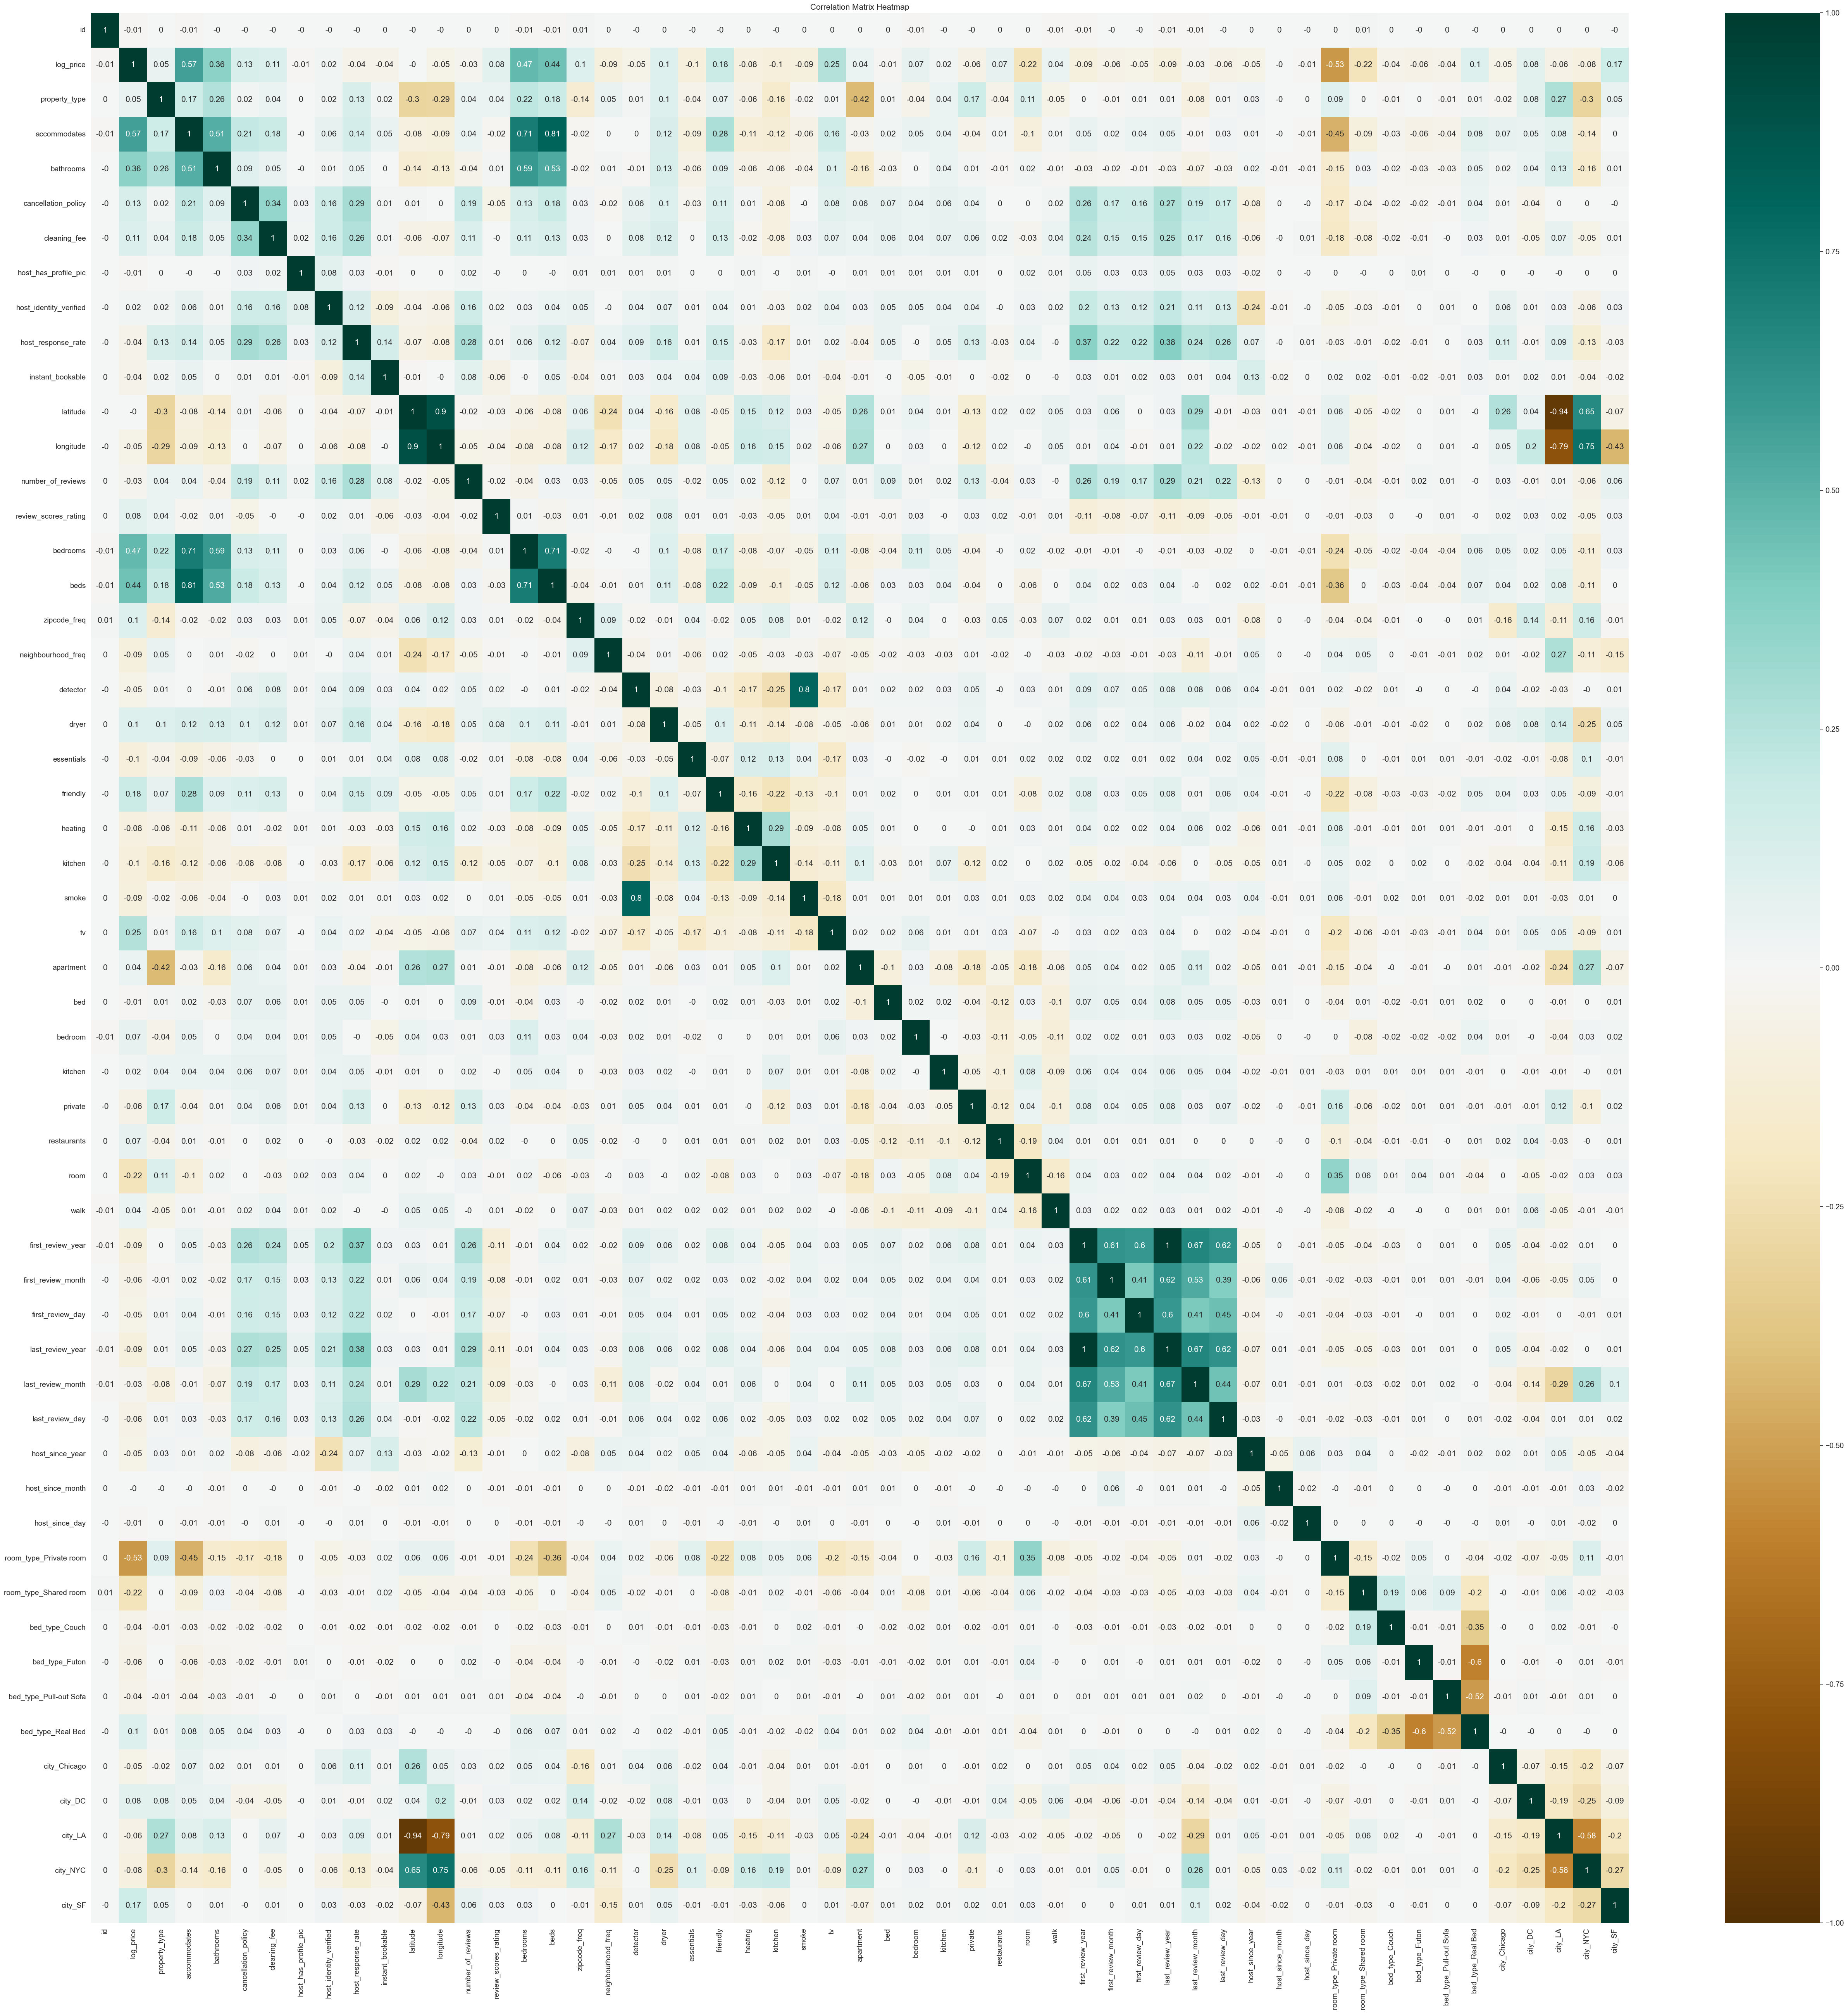

In [27]:
# Perform correlation analysis
correlation_matrix = data_cleaned.corr()

# Extract the correlation of features with the target variable log_price
target_correlation = correlation_matrix['log_price'].sort_values(ascending=False)


# Plot the heatmap
plt.figure(figsize=(64, 64))
sns.set(font_scale=1.25)
ax = sns.heatmap(correlation_matrix.round(2), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Correlation Matrix Heatmap')
plt.show()

## Data quality

In [28]:
import great_expectations as gx
import pandas as pd
from great_expectations.data_context import BaseDataContext

In [29]:
data = pd.read_csv('./Airbnb_Data.csv')

In [30]:
from great_expectations.data_context import FileDataContext

FileDataContext(project_root_dir = "services")

{
  "anonymous_usage_statistics": {
    "data_context_id": "a4e9b8d2-5be4-4fc8-bb73-7f2175874c57",
    "enabled": true,
    "explicit_id": true,
    "usage_statistics_url": "https://stats.greatexpectations.io/great_expectations/v1/usage_statistics",
    "explicit_url": false
  },
  "checkpoint_store_name": "checkpoint_store",
  "config_variables_file_path": "uncommitted/config_variables.yml",
  "config_version": 3.0,
  "data_docs_sites": {
    "local_site": {
      "class_name": "SiteBuilder",
      "show_how_to_buttons": true,
      "store_backend": {
        "class_name": "TupleFilesystemStoreBackend",
        "base_directory": "uncommitted/data_docs/local_site/"
      },
      "site_index_builder": {
        "class_name": "DefaultSiteIndexBuilder"
      }
    }
  },
  "datasources": {},
  "evaluation_parameter_store_name": "evaluation_parameter_store",
  "expectations_store_name": "expectations_store",
  "fluent_datasources": {
    "pandas_datasource": {
      "type": "pandas",
    

In [31]:
context = gx.get_context(project_root_dir = "services")
context

{
  "anonymous_usage_statistics": {
    "data_context_id": "a4e9b8d2-5be4-4fc8-bb73-7f2175874c57",
    "enabled": true,
    "explicit_id": true,
    "usage_statistics_url": "https://stats.greatexpectations.io/great_expectations/v1/usage_statistics",
    "explicit_url": false
  },
  "checkpoint_store_name": "checkpoint_store",
  "config_variables_file_path": "uncommitted/config_variables.yml",
  "config_version": 3.0,
  "data_docs_sites": {
    "local_site": {
      "class_name": "SiteBuilder",
      "show_how_to_buttons": true,
      "store_backend": {
        "class_name": "TupleFilesystemStoreBackend",
        "base_directory": "uncommitted/data_docs/local_site/"
      },
      "site_index_builder": {
        "class_name": "DefaultSiteIndexBuilder"
      }
    }
  },
  "datasources": {},
  "evaluation_parameter_store_name": "evaluation_parameter_store",
  "expectations_store_name": "expectations_store",
  "fluent_datasources": {
    "pandas_datasource": {
      "type": "pandas",
    

In [32]:
ds = context.sources.add_or_update_pandas(name = "pandas_datasource")
ds

PandasDatasource(type='pandas', name='pandas_datasource', id=None, assets=[])

In [33]:
da1 = ds.add_dataframe_asset(name = "dataframe_asset")
da1

DataFrameAsset(name='dataframe_asset', type='dataframe', id=None, order_by=[], batch_metadata={})

In [34]:
batch_request = da1.build_batch_request(dataframe=data)
batches = da1.get_batch_list_from_batch_request(batch_request)
for batch in batches:
    print(batch.batch_spec)

batches[0].head()


{'batch_data': 'PandasDataFrame'}


Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

         id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee  ...   latitude   longitude  \
0  Real Bed              strict          True  ...  40.696524  -73.991617   
1  Real Bed     

In [35]:
context.add_or_update_expectation_suite("initial_data_validation")
context.list_expectation_suites()

[ExpectationSuiteIdentifier::initial_data_validation]

In [36]:
validator = context.get_validator(
    batch_request=batch_request,
    expectation_suite_name="initial_data_validation"
)

validator.head()


Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee  ...   latitude   longitude  \
0  Real Bed              strict          True  ...  40.696524  -73.991617   
1  Real Bed              strict          True  ...  40.766115  -73.989040   
2  Real Bed            moderate          True  ...  40.808110  -73.943756   
3  Real Bed            flexible          True  ...  37.772004 -122.431619   
4  Real Bed            moderate          True  ...  38.925627  -77.034596   

                                       name     neighbourhood  \
0            Beautiful brownstone 1-bedroom  Brooklyn Heights   
1  Superb 3BR Apt Located Near Times Square    Hell's Kitchen   
2                          The Garden Oasis            Harlem   
3        Beautiful Flat in the Heart of SF!      Lower Haight   
4                Great studio in midtown DC  Columbia Heights   

  number_of_reviews review_scores_rating  \
0                 2                100.0   
1                 6                 93.0   
2                10                 92.0   
3                 0                  NaN   
4                 4                 40.0   

                                       thumbnail_url  zipcode bedrooms  beds  
0  https://a0.muscache.com/im/pictures/6d7cbbf7-c...    11201      1.0   1.0  
1  https://a0.muscache.com/im/pictures/348a55fe-4...    10019      3.0   3.0  
2  https://a0.muscache.com/im/pictures/6fae5362-9...    10027      1.0   3.0  
3  https://a0.muscache.com/im/pictures/72208dad-9...  94117.0      2.0   2.0  
4                                                NaN    20009      0.0   1.0  

[5 rows x 29 columns]

### Validation Expectations for Airbnb Dataset

#### Completeness Checks

- **ID Completeness**:
  - Ensures that every entry in the `id` column is not null, verifying data integrity and completeness.

- **Log Price Validity**:
  - Validates that `log_price` values fall within a reasonable range (0 to 10), ensuring consistency in pricing data.

- **Accommodates Validity**:
  - Checks that `accommodates` values are between 1 and 16, reflecting the capacity of each Airbnb accommodation.

- **Bathrooms Validity**:
  - Verifies that `bathrooms` values are within the acceptable range of 0 to 10, ensuring accuracy in property amenities.

- **Bedrooms Completeness**:
  - Validates that `bedrooms` values range from 0 to 20, confirming the completeness of bedroom information for each property.

- **Review Scores Rating Validity**:
  - Ensures that `review_scores_rating` values are between 0 and 100, providing a standardized measure of guest satisfaction.

- **Latitude and Longitude Validity**:
  - Checks that `latitude` values range from -90 to 90 and `longitude` values range from -180 to 180, verifying geographical coordinates are within valid global ranges.

- **Zipcode Format Validity**:
  - Validates that `zipcode` values adhere to the regex pattern `r'^\d{5}$'`, ensuring each entry is a 5-digit numeric code without decimals.

#### Uniqueness Check

- **ID Uniqueness**:
  - Ensures each `id` in the dataset is unique, preventing duplicates and ensuring each record is uniquely identifiable.

---


In [39]:
# Completeness
ex1 = validator.expect_column_values_to_not_be_null(column="id")
assert ex1['success']

# Uniqueness
ex2 = validator.expect_column_values_to_be_unique(column="id")
assert ex2['success']

# Validity of log_price
ex3 = validator.expect_column_values_to_be_between(column="log_price", min_value=0, max_value=10)
assert ex3['success']

# Validity of accommodates
ex4 = validator.expect_column_values_to_be_between(column="accommodates", min_value=1, max_value=16)
assert ex4['success']


# Validity of bathrooms
ex5 = validator.expect_column_values_to_be_between(column="bathrooms", min_value=0, max_value=10)
assert ex5['success']

# Completeness of bedrooms
ex6 = validator.expect_column_values_to_be_between(column="bedrooms",min_value=0, max_value=20)
assert ex6['success']

# Validity of review_scores_rating
ex7 = validator.expect_column_values_to_be_between(column="review_scores_rating", min_value=0, max_value=100)
assert ex7['success']


# Validity of latitude and longitude
ex8 = validator.expect_column_values_to_be_between(column="latitude", min_value=-90, max_value=90)
assert ex8['success']

ex9 = validator.expect_column_values_to_be_between(column="longitude", min_value=-180, max_value=180)
assert ex9['success']


Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

## Proof-of-Concept (POC) ML Model

we will use a simple Multilayer perceptron from SkLearn

Iteration 1, loss = 664.19567738
Iteration 2, loss = 0.51183570
Iteration 3, loss = 0.41421120
Iteration 4, loss = 0.37215015
Iteration 5, loss = 0.34533308
Iteration 6, loss = 0.32915220
Iteration 7, loss = 0.31204235
Iteration 8, loss = 0.30260204
Iteration 9, loss = 0.28532945
Iteration 10, loss = 0.27285820
Iteration 11, loss = 0.25395155
Iteration 12, loss = 0.23926361
Iteration 13, loss = 0.25548187
Iteration 14, loss = 0.22391933
Iteration 15, loss = 0.20400247
Iteration 16, loss = 0.19232470
Iteration 17, loss = 0.20819963
Iteration 18, loss = 0.22168091
Iteration 19, loss = 0.40419643
Iteration 20, loss = 0.69591921
Iteration 21, loss = 0.53162233
Iteration 22, loss = 0.65044985
Iteration 23, loss = 0.63246273
Iteration 24, loss = 0.59547733
Iteration 25, loss = 0.73271648
Iteration 26, loss = 0.49900262
Iteration 27, loss = 0.65647872
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training MSE: 0.2559335788500468
Testing MSE: 0.25957

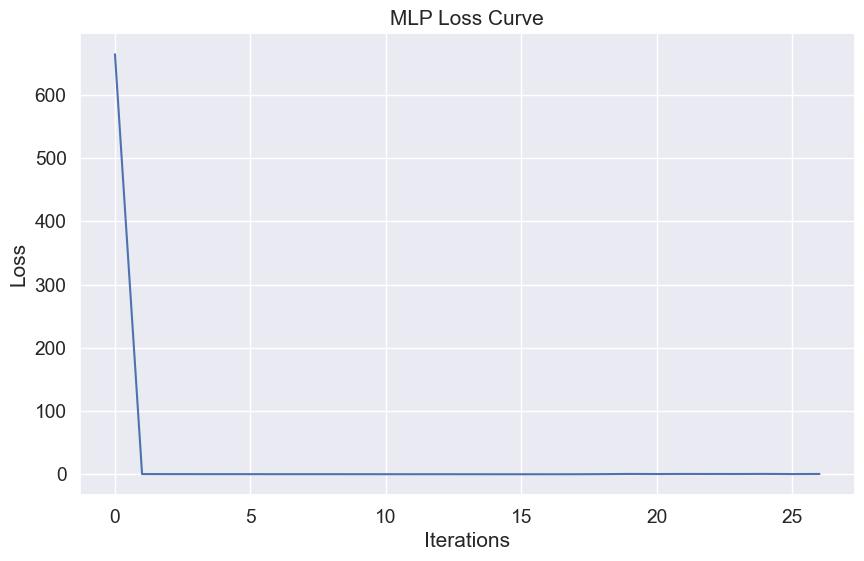

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Prepare data for ML model
X = data_cleaned.drop(columns=['log_price', 'id'])
y = data_cleaned['log_price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Build and train the MLP model
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, verbose=True)
mlp.fit(X_train, y_train)

# Make predictions
y_pred_train = mlp.predict(X_train)
y_pred_test = mlp.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(mlp.loss_curve_)
plt.title('MLP Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()